# Unearthing Plant-Fungal Relationships for Ecosystem Restoration: A Meta-Analysis of MycoDB

## Project Description:

Exploring plant-fungal relationships through a meta-analysis of MycoDB reveals insights into their potential for climate change mitigation. MycoDB, the largest ecological meta-analysis database, showcases 4,010 studies elucidating the ecological and evolutionary context of mycorrhizal symbioses.

By analyzing the extensive data available in MycoDB, this meta-analysis sheds light on patterns and trends in plant-fungal relationships, including mutualistic interactions that contribute to increased plant biomass. This understanding is crucial for optimizing ecosystem functioning and resilience, as plant-fungal associations play key roles in nutrient cycling, carbon sequestration, and soil health.

Conducting a meta-analysis of MycoDB has the potential to advance our understanding of plant-fungal relationships and their significance for environmental sustainability, climate change mitigation, conservation, agriculture, and policy development. By uncovering ecological patterns and identifying effective strategies, this research can contribute to more informed and evidence-based approaches to addressing pressing environmental challenges.

In [468]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import rma
import math
from scipy.stats import chi2
from scipy.stats import norm
import forestplot as fp


In [469]:
#Read the file
myco_data = pd.read_csv("/Users/alzo11/dataviz_mycoDB/doi_10_5061_dryad_723m1__v20170413/MycoDB_version4.csv")

## Understanding the Data

In [470]:
print("\nLength of dataframe:", len(myco_data))
#Show top records of dataset
myco_data.head()


Length of dataframe: 4581


,NONCTLTRTSETID,PlantSpecies2018,FungalGenus2018,EMF_ORIGIN_TED,EMF_ORIGIN_ALT,Hoeksema2018,EXPERIMENTID,CTLTRTSETID,LASTNAME1,LASTNAME2,...,LA_Code,Plant_Lat,Plant_Long,Fung_Lat,Fung_Long,Soil_Lat,Soil_Long,AM_single_genus,EM_single_genus,Karst2018
0,75,medicago_sativa,glomus,NaN,NaN,YES,5,78.0,Medina,Probanza,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,YES,NO,NO
1,76,medicago_sativa,rhizophagus,NaN,NaN,YES,5,78.0,Medina,Probanza,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,YES,NO,NO
2,77,medicago_sativa,funneliformis,NaN,NaN,YES,5,78.0,Medina,Probanza,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,YES,NO,NO
3,79,medicago_sativa,glomus,NaN,NaN,YES,5,82.0,Medina,Probanza,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,YES,NO,NO
4,80,medicago_sativa,rhizophagus,NaN,NaN,YES,5,82.0,Medina,Probanza,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,YES,NO,NO


In [471]:
#Check the datatypes of each column
print(myco_data.dtypes)

NONCTLTRTSETID           int64
PlantSpecies2018        object
FungalGenus2018         object
EMF_ORIGIN_TED         float64
EMF_ORIGIN_ALT         float64
Hoeksema2018            object
EXPERIMENTID             int64
CTLTRTSETID            float64
LASTNAME1               object
LASTNAME2               object
PAPERYEAR                int64
JOURNALNAME             object
PAPERTITLE              object
PAPERDATASOURCENAME     object
EFFECTSIZE1            float64
ESTVAR1                float64
ESTVAR3                float64
ctrl_mass              float64
ctrl_reps              float64
ctrl_sd                float64
trt_mass               float64
trt_reps               float64
trt_sd                 float64
PlantFamily             object
PlantSpecies            object
PlantSpeciesMar2017     object
FungalGenus             object
PLANTLIFEHISTORY        object
FUNGROUP                object
NONMYCOCONTROL          object
NONMYCOCONTROL2         object
FERTP                   object
FERTN   

In [472]:
#View all columns with dtype=float 
df_float = myco_data.select_dtypes(include=[np.float])
print("\nAll columns where data type = 'float':\n", df_float.columns)


All columns where data type = 'float':
 Index(['EMF_ORIGIN_TED', 'EMF_ORIGIN_ALT', 'CTLTRTSETID', 'EFFECTSIZE1',
       'ESTVAR1', 'ESTVAR3', 'ctrl_mass', 'ctrl_reps', 'ctrl_sd', 'trt_mass',
       'trt_reps', 'trt_sd', 'Fung_Lat'],
      dtype='object')


Note for data cleaning: change dtype of 'CTRLSETID', 'ctrl_reps', and 'trt_reps' from float to int

In [473]:
#View all columns with dtype=object 
df_object = myco_data.select_dtypes(include=[np.object])
print("\nAll columns where data type = 'object':\n", df_object.columns)


All columns where data type = 'object':
 Index(['PlantSpecies2018', 'FungalGenus2018', 'Hoeksema2018', 'LASTNAME1',
       'LASTNAME2', 'JOURNALNAME', 'PAPERTITLE', 'PAPERDATASOURCENAME',
       'PlantFamily', 'PlantSpecies', 'PlantSpeciesMar2017', 'FungalGenus',
       'PLANTLIFEHISTORY', 'FUNGROUP', 'NONMYCOCONTROL', 'NONMYCOCONTROL2',
       'FERTP', 'FERTN', 'INOC.COMPLEXITY', 'STERILIZED', 'MYCORRHIZAETYPE',
       'LOCATION', 'DOMESTICATED', 'Rua2016', 'Rua2017', 'Loc_Ad_appropriate',
       'LA_Code', 'Plant_Lat', 'Plant_Long', 'Fung_Long', 'Soil_Lat',
       'Soil_Long', 'AM_single_genus', 'EM_single_genus', 'Karst2018'],
      dtype='object')


Note for data cleaning: change dtype of 'Plant_Lat', 'Plant_Long', 'Fung_Long', 'Soil_Lat', and 'Soil_Long' from object to float

In [474]:
#View all columns with dtype=int
df_int = myco_data.select_dtypes(include=[np.int])
print("\nAll columns where data type = 'int':\n", df_int.columns)


All columns where data type = 'int':
 Index(['NONCTLTRTSETID', 'EXPERIMENTID', 'PAPERYEAR'], dtype='object')


### Summary Statistics:

In [475]:
myco_data.describe(include=['object'])

,PlantSpecies2018,FungalGenus2018,Hoeksema2018,LASTNAME1,LASTNAME2,JOURNALNAME,PAPERTITLE,PAPERDATASOURCENAME,PlantFamily,PlantSpecies,...,Loc_Ad_appropriate,LA_Code,Plant_Lat,Plant_Long,Fung_Long,Soil_Lat,Soil_Long,AM_single_genus,EM_single_genus,Karst2018
count,4008,3399,4581,4581,4581,4581,4581,4581,4581,4581,...,4581,1574,829,829,1452,1201,1201,4581,4581,4581
unique,349,54,2,403,390,160,527,3,78,401,...,2,15,141,142,257,161,159,2,2,2
top,zea_mays,rhizophagus,YES,Lamhamedi,Malajczuk,Plant and Soil,Genetic variation in ectomycorrhiza formation ...,Sept 2010 Main Search,fabaceae,zea_mays,...,NO,M,-21.242481,-44.997667,-45.430814,-27.499853,121.590384,YES,NO,NO
freq,217,914,4008,106,169,574,106,2312,1122,217,...,3007,306,53,53,53,64,64,2398,3580,3016


In [476]:
#using pandas method .describe() to compute summary statistics
myco_data.describe()

,NONCTLTRTSETID,EMF_ORIGIN_TED,EMF_ORIGIN_ALT,EXPERIMENTID,CTLTRTSETID,PAPERYEAR,EFFECTSIZE1,ESTVAR1,ESTVAR3,ctrl_mass,ctrl_reps,ctrl_sd,trt_mass,trt_reps,trt_sd,Fung_Lat
count,4581.000000,1001.00000,1001.000000,4581.000000,4581.00000,4581.000000,4581.000000,4553.000000,4.670000e+02,4581.000000,4555.000000,469.000000,4579.000000,4556.000000,493.000000,1452.000000
mean,9370.833879,19.35964,18.358641,855.104344,9347.50644,2000.888889,0.417020,0.514449,1.094698e-01,314.661572,7.541603,9.099589,191.260865,7.410667,17.107397,21.554942
std,5412.934396,4.28095,4.284653,454.528574,5379.13781,7.891907,0.834198,0.483052,2.172414e-01,5287.360505,9.663518,34.479558,730.080912,9.871164,121.598538,31.369948
min,75.000000,1.00000,1.000000,5.000000,78.00000,1976.000000,-9.421649,0.010000,5.540000e-08,0.000000,1.000000,0.005000,0.000000,1.000000,0.002000,-45.859835
25%,3740.000000,18.00000,17.000000,457.000000,3748.00000,1995.000000,0.013383,0.200000,5.135164e-03,1.000000,3.000000,0.149283,1.620000,3.000000,0.149283,-0.633330
50%,10825.000000,22.00000,21.000000,860.000000,10831.00000,2001.000000,0.242140,0.400000,2.442092e-02,3.683000,5.000000,0.320000,5.134260,5.000000,0.328634,35.349311
75%,14507.000000,22.00000,21.000000,1301.000000,14495.00000,2007.000000,0.631112,0.666667,1.120183e-01,26.600000,10.000000,1.281718,34.600000,10.000000,1.281718,44.900000
max,16432.000000,24.00000,23.000000,1541.000000,16056.00000,2016.000000,7.377759,2.000000,2.289086e+00,159091.000000,200.000000,392.122430,12924.000000,200.000000,2479.225686,69.570000


In [477]:
dupes_by_name = myco_data[myco_data.duplicated('NONCTLTRTSETID')]
dupes_by_name.count()

NONCTLTRTSETID         0
PlantSpecies2018       0
FungalGenus2018        0
EMF_ORIGIN_TED         0
EMF_ORIGIN_ALT         0
Hoeksema2018           0
EXPERIMENTID           0
CTLTRTSETID            0
LASTNAME1              0
LASTNAME2              0
PAPERYEAR              0
JOURNALNAME            0
PAPERTITLE             0
PAPERDATASOURCENAME    0
EFFECTSIZE1            0
ESTVAR1                0
ESTVAR3                0
ctrl_mass              0
ctrl_reps              0
ctrl_sd                0
trt_mass               0
trt_reps               0
trt_sd                 0
PlantFamily            0
PlantSpecies           0
PlantSpeciesMar2017    0
FungalGenus            0
PLANTLIFEHISTORY       0
FUNGROUP               0
NONMYCOCONTROL         0
NONMYCOCONTROL2        0
FERTP                  0
FERTN                  0
INOC.COMPLEXITY        0
STERILIZED             0
MYCORRHIZAETYPE        0
LOCATION               0
DOMESTICATED           0
Rua2016                0
Rua2017                0


In [478]:
myco_data.sort_values(['NONCTLTRTSETID', 'EFFECTSIZE1'],
        ascending=[1,0])

,NONCTLTRTSETID,PlantSpecies2018,FungalGenus2018,EMF_ORIGIN_TED,EMF_ORIGIN_ALT,Hoeksema2018,EXPERIMENTID,CTLTRTSETID,LASTNAME1,LASTNAME2,...,LA_Code,Plant_Lat,Plant_Long,Fung_Lat,Fung_Long,Soil_Lat,Soil_Long,AM_single_genus,EM_single_genus,Karst2018
0,75,medicago_sativa,glomus,NaN,NaN,YES,5,78.0,Medina,Probanza,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,YES,NO,NO
1,76,medicago_sativa,rhizophagus,NaN,NaN,YES,5,78.0,Medina,Probanza,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,YES,NO,NO
2,77,medicago_sativa,funneliformis,NaN,NaN,YES,5,78.0,Medina,Probanza,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,YES,NO,NO
3,79,medicago_sativa,glomus,NaN,NaN,YES,5,82.0,Medina,Probanza,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,YES,NO,NO
4,80,medicago_sativa,rhizophagus,NaN,NaN,YES,5,82.0,Medina,Probanza,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,YES,NO,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4576,16428,NaN,NaN,NaN,NaN,NO,1535,15991.0,Lukesova,Kohout,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,NO,YES
4577,16429,NaN,NaN,NaN,NaN,NO,1536,15869.0,Sousa,Franco,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,NO,YES
4578,16430,NaN,NaN,NaN,NaN,NO,1536,15869.0,Sousa,Franco,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,NO,YES
4579,16431,NaN,NaN,NaN,NaN,NO,1536,15890.0,Sousa,Franco,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,NO,YES


In [479]:
# myco_data = myco_data.set_index('NONCTLTRTSETID')
# myco_data.head()
# select the first 10 rows
myco_data[0:10]
# myco_data.set_index('NONCTLTRTSETID', inplace=True)

,NONCTLTRTSETID,PlantSpecies2018,FungalGenus2018,EMF_ORIGIN_TED,EMF_ORIGIN_ALT,Hoeksema2018,EXPERIMENTID,CTLTRTSETID,LASTNAME1,LASTNAME2,...,LA_Code,Plant_Lat,Plant_Long,Fung_Lat,Fung_Long,Soil_Lat,Soil_Long,AM_single_genus,EM_single_genus,Karst2018
0,75,medicago_sativa,glomus,NaN,NaN,YES,5,78.0,Medina,Probanza,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,YES,NO,NO
1,76,medicago_sativa,rhizophagus,NaN,NaN,YES,5,78.0,Medina,Probanza,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,YES,NO,NO
2,77,medicago_sativa,funneliformis,NaN,NaN,YES,5,78.0,Medina,Probanza,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,YES,NO,NO
3,79,medicago_sativa,glomus,NaN,NaN,YES,5,82.0,Medina,Probanza,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,YES,NO,NO
4,80,medicago_sativa,rhizophagus,NaN,NaN,YES,5,82.0,Medina,Probanza,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,YES,NO,NO
5,81,medicago_sativa,funneliformis,NaN,NaN,YES,5,82.0,Medina,Probanza,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,YES,NO,NO
6,83,medicago_sativa,glomus,NaN,NaN,YES,5,86.0,Medina,Probanza,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,YES,NO,NO
7,84,medicago_sativa,rhizophagus,NaN,NaN,YES,5,86.0,Medina,Probanza,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,YES,NO,NO
8,85,medicago_sativa,funneliformis,NaN,NaN,YES,5,86.0,Medina,Probanza,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,YES,NO,NO
9,129,apium_graveolens,rhizophagus,NaN,NaN,YES,17,128.0,Rice,Datnoff,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,YES,NO,NO


In [480]:
# myco_data.loc[76]


In [481]:
columns_missing_data_sum = myco_data.isnull().sum()
columns_missing_data = columns_missing_data_sum[columns_missing_data_sum > 0]
print(columns_missing_data)

PlantSpecies2018        573
FungalGenus2018        1182
EMF_ORIGIN_TED         3580
EMF_ORIGIN_ALT         3580
ESTVAR1                  28
ESTVAR3                4114
ctrl_reps                26
ctrl_sd                4112
trt_mass                  2
trt_reps                 25
trt_sd                 4088
PlantSpeciesMar2017    2981
FungalGenus             631
DOMESTICATED           1597
LA_Code                3007
Plant_Lat              3752
Plant_Long             3752
Fung_Lat               3129
Fung_Long              3129
Soil_Lat               3380
Soil_Long              3380
dtype: int64


In [482]:
print("\nLength of dataframe before data cleaning:", len(myco_data))


Length of dataframe before data cleaning: 4581


## Data Manipulation/Cleaning

Table 1, which holds the summary of meta-data for each column in MycoDB, states that the values for ctrl_reps and trt_reps were coded as '1' if the puplication did not provide data on replication. Thus, any rows that contain a value of '1' for either ctrl_reps or trt_reps will be deleted because the uncertainty about whether the '1' indicates missing values or that 1 rep was actually done can skew the analysis. 

After deleting rows that are missing values for ctrl_reps or trt_reps:
If 'ESTVAL1' still has any missing values, but ctrl_reps and trt_reps values are known, then 'ESTVAL1' will be set to = (1/ctrl_reps) + (1/trt_reps)

In [483]:
#Delete rows where 'ctrl_reps', 'trt_reps', 'trt_mass' is NA
myco_data = myco_data[myco_data[['ctrl_reps', 'trt_reps', 'trt_mass']].notna().all(axis=1)]

#Delete rows where 'ctrl_reps' == 1
myco_data = myco_data[myco_data['ctrl_reps'] != 1]

#Delete rows where 'trt_reps' == 1
myco_data = myco_data[myco_data['trt_reps'] != 1]

#Confirm that deletions were made correctly
print(myco_data['ctrl_reps'].isna().sum())
print(myco_data['trt_reps'].isna().sum())
print(myco_data['trt_mass'].isna().sum())
print((myco_data['ctrl_reps'] == 1).sum())
print((myco_data['trt_reps'] == 1).sum())

#Check if there is any missing data left in 'ESTVAR1' after cleaning ctrl_reps & trt_reps
print(myco_data['ESTVAR1'].isna().sum())
    #If value is 0, additional steps not needed
    #If value > 0, but ctrl_reps and trt_reps values are known, 'ESTVAL1' will be set to = (1/ctrl_reps) + (1/trt_reps)

0
0
0
0
0
0


#### Updating 'PlantSpecies' Column
PlantSpecies2018 did not include taxonomy updates incorporated into PlantSpeciesMar2017 “in order to maintain compatibility with the companion plant phylogeny published with MycoDB Version 4.” Since I will not be incorporating the phylogenetic trees in the analysis, I decided to prioritize the labels in PlantSpeciesMar2017 over PlantSpecies2018. 

Names for arbuscular mycorrhizal (AM) plants added to PlantSpecies2018 are the same as the AM plants listed under PlantSpecies column, except for the two spelling corrections (Cytharexylum changed to Citharexylum and Macherium changed to Machaerium). Since PlantSpecies2018 includes those corrections, will be replacing PlantSpecies with the values under PlantSpecies2018 except for values that are different from PlantSpeciesMar2017. 

In [484]:
# Taxonomy update for PlantSpecies
condition_taxonomy_update = (myco_data['PlantSpecies2018'] != myco_data['PlantSpeciesMar2017']) & (~myco_data['PlantSpeciesMar2017'].isna())
myco_data.loc[condition_taxonomy_update, 'PlantSpecies'] = myco_data.loc[condition_taxonomy_update, 'PlantSpeciesMar2017']

# Replace PlantSpecies value with PlantSpecies2018 value when condition is not met
myco_data['PlantSpecies'].fillna(myco_data['PlantSpecies2018'], inplace=True)

#### Updating 'FungalGenus' Column

“"FungalGenus2018" = Fungal genus names used in the analyses by Hoeksema et al. (2018), updated based on recent taxonomic studies.” Updating 'FungalGenus' with values from 'FungalGenus2018' for rows where the values are different between the two columns AND 'FungalGenus2018' is not NaN.

Keeping rows where FungalGenus data includes NaN for the AM & EM subgroup analysis, but will remove these rows for the PlantSpecies & FungalGenus combination subgroup analysis.

In [485]:
# FungalGenus update
condition_fungal_genus_update = (myco_data['FungalGenus'] != myco_data['FungalGenus2018']) & (~myco_data['FungalGenus2018'].isna())
myco_data.loc[condition_fungal_genus_update, 'FungalGenus'] = myco_data.loc[condition_fungal_genus_update, 'FungalGenus2018']

In [486]:
# Display the cleaned DataFrame
myco_data.head()

,NONCTLTRTSETID,PlantSpecies2018,FungalGenus2018,EMF_ORIGIN_TED,EMF_ORIGIN_ALT,Hoeksema2018,EXPERIMENTID,CTLTRTSETID,LASTNAME1,LASTNAME2,...,LA_Code,Plant_Lat,Plant_Long,Fung_Lat,Fung_Long,Soil_Lat,Soil_Long,AM_single_genus,EM_single_genus,Karst2018
0,75,medicago_sativa,glomus,NaN,NaN,YES,5,78.0,Medina,Probanza,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,YES,NO,NO
1,76,medicago_sativa,rhizophagus,NaN,NaN,YES,5,78.0,Medina,Probanza,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,YES,NO,NO
2,77,medicago_sativa,funneliformis,NaN,NaN,YES,5,78.0,Medina,Probanza,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,YES,NO,NO
3,79,medicago_sativa,glomus,NaN,NaN,YES,5,82.0,Medina,Probanza,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,YES,NO,NO
4,80,medicago_sativa,rhizophagus,NaN,NaN,YES,5,82.0,Medina,Probanza,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,YES,NO,NO


#### Removing Unused Columns

In [487]:
#Remove columns ['PlantSpecies2018', 'FungalGenus2018', 'PlantSpeciesMar2017'] as they have been aggregated into 'PlantSpecies' and 'FungalGenus' columns
columns_to_remove2 = ['PlantSpecies2018', 'FungalGenus2018', 'PlantSpeciesMar2017']
myco_data = myco_data.drop(columns=columns_to_remove2)

#Other columns to remove (either not needed for analysis or contain too much missing data to be useful)
columns_to_remove = ['EMF_ORIGIN_TED', 'EMF_ORIGIN_ALT','ESTVAR3', 'ctrl_sd', 'trt_sd', 'PAPERDATASOURCENAME', 'Karst2018', 'Rua2016', 'Rua2017', 'Hoeksema2018']
myco_data = myco_data.drop(columns=columns_to_remove)

#Check if columns were deleted
myco_data.columns

Index(['NONCTLTRTSETID', 'EXPERIMENTID', 'CTLTRTSETID', 'LASTNAME1',
       'LASTNAME2', 'PAPERYEAR', 'JOURNALNAME', 'PAPERTITLE', 'EFFECTSIZE1',
       'ESTVAR1', 'ctrl_mass', 'ctrl_reps', 'trt_mass', 'trt_reps',
       'PlantFamily', 'PlantSpecies', 'FungalGenus', 'PLANTLIFEHISTORY',
       'FUNGROUP', 'NONMYCOCONTROL', 'NONMYCOCONTROL2', 'FERTP', 'FERTN',
       'INOC.COMPLEXITY', 'STERILIZED', 'MYCORRHIZAETYPE', 'LOCATION',
       'DOMESTICATED', 'Loc_Ad_appropriate', 'LA_Code', 'Plant_Lat',
       'Plant_Long', 'Fung_Lat', 'Fung_Long', 'Soil_Lat', 'Soil_Long',
       'AM_single_genus', 'EM_single_genus'],
      dtype='object')

In [488]:
#Show top records of dataset
#myco_data.head()
print(myco_data[['EXPERIMENTID', 'NONCTLTRTSETID', 'CTLTRTSETID', 'PlantSpecies', 'FungalGenus', 'FUNGROUP',
       'NONMYCOCONTROL', 'NONMYCOCONTROL2', 'FERTP', 'FERTN',
       'INOC.COMPLEXITY', 'STERILIZED', 'MYCORRHIZAETYPE']].head(20))

    EXPERIMENTID  NONCTLTRTSETID  CTLTRTSETID            PlantSpecies  \
0              5              75         78.0         medicago_sativa   
1              5              76         78.0         medicago_sativa   
2              5              77         78.0         medicago_sativa   
3              5              79         82.0         medicago_sativa   
4              5              80         82.0         medicago_sativa   
5              5              81         82.0         medicago_sativa   
6              5              83         86.0         medicago_sativa   
7              5              84         86.0         medicago_sativa   
8              5              85         86.0         medicago_sativa   
9             17             129        128.0        apium_graveolens   
10            17             130        128.0        apium_graveolens   
11            17             131        128.0        apium_graveolens   
12            18             133        132.0      

In [489]:
#Ran into error on line 1388 converting certain column values to floats since it encounters a string ('Unknown') that cannot be directly cast as a float
#To address this, will first check for columns containing 'Unknown' and count occurrences, then will replace 'Unknown' in these columns with NaN
for col in myco_data.columns:
  if myco_data[col].eq('Unknown').any():
    count_unknown = myco_data[col].eq('Unknown').sum()
    print(f"Column '{col}' has '{count_unknown}' occurrences of 'Unknown'")

Column 'Plant_Lat' has '16' occurrences of 'Unknown'
Column 'Plant_Long' has '16' occurrences of 'Unknown'


In [490]:
# Replace 'Unknown' with np.nan in Plant_Lat and Plant_Long columns
cols_to_replace = ['Plant_Lat', 'Plant_Long']
for col in cols_to_replace:
    myco_data[col] = myco_data[col].replace('Unknown', np.nan)

In [491]:
#Encountered an error in line 1388 stating that the 'Fung_Long' column has values with two decimal points
#To address this, will identify rows with two decimal points and delete the second one (since the second decimal place should not be there)

#Identify all rows where the 'Fung_Long' column contains more than one decimal point
problematic_rows = myco_data[myco_data['Fung_Long'].str.count('\.') > 1]

#Clean the data
#Want to remove only the second decimal point and keep all the numerical values intact
#To do this, splitting the value at each decimal point ('.') and concatenating the parts except for the second one. 
#This way, it will keep all the numerical values intact while removing only the second decimal point.
for index, row in problematic_rows.iterrows():
    parts = row['Fung_Long'].split('.')
    if len(parts) > 2:  # Check if there are more than two parts (i.e., more than one decimal point)
        correct_value = parts[0] + '.' + ''.join(parts[1:])  # Concatenate the parts excluding the second decimal point
        myco_data.at[index, 'Fung_Long'] = correct_value


In [492]:
#Encountered an error in line 1388 stating that 'Soil_Lat' column has non-numeric values (e.g.'38.345203 N')
#To address this, removing non-numeric characters from 'Soil_Lat' column (excluding decimal points)
myco_data['Soil_Lat'] = myco_data['Soil_Lat'].str.replace(r'[^0-9.]', '')

In [493]:
#Encountered an error in line 1388 stating that 'Soil_Long' column has non-numeric values (e.g.'0.481006 W')
#To address this, removing non-numeric characters from 'Soil_Long' column (excluding decimal points); same as code above
myco_data['Soil_Long'] = myco_data['Soil_Long'].str.replace(r'[^0-9.]', '')

#### Converting Datatypes

In [494]:
myco_data['CTLTRTSETID'] = myco_data['CTLTRTSETID'].astype(int)
myco_data['ctrl_reps'] = myco_data['ctrl_reps'].astype(int)
myco_data['trt_reps'] = myco_data['trt_reps'].astype(int)
myco_data['Plant_Lat'] = myco_data['Plant_Lat'].astype(float)
myco_data['Plant_Long'] = myco_data['Plant_Long'].astype(float)
myco_data['Fung_Lat'] = myco_data['Fung_Lat'].astype(float)
myco_data['Fung_Long'] = myco_data['Fung_Long'].astype(float)
myco_data['Soil_Lat'] = myco_data['Soil_Lat'].astype(float)
myco_data['Soil_Long'] = myco_data['Soil_Long'].astype(float)

#Check to confirm all columns have the correct datatype
# print(myco_data.dtypes)

#View all columns with dtype=float 
df_float = myco_data.select_dtypes(include=[np.float])
print("\nAll columns where data type = 'float':\n", df_float.columns)

#View all columns with dtype=object 
df_object = myco_data.select_dtypes(include=[np.object])
print("\nAll columns where data type = 'object':\n", df_object.columns)

#View all columns with dtype=int
df_int = myco_data.select_dtypes(include=[np.int])
print("\nAll columns where data type = 'int':\n", df_int.columns)


All columns where data type = 'float':
 Index(['EFFECTSIZE1', 'ESTVAR1', 'ctrl_mass', 'trt_mass', 'Plant_Lat',
       'Plant_Long', 'Fung_Lat', 'Fung_Long', 'Soil_Lat', 'Soil_Long'],
      dtype='object')

All columns where data type = 'object':
 Index(['LASTNAME1', 'LASTNAME2', 'JOURNALNAME', 'PAPERTITLE', 'PlantFamily',
       'PlantSpecies', 'FungalGenus', 'PLANTLIFEHISTORY', 'FUNGROUP',
       'NONMYCOCONTROL', 'NONMYCOCONTROL2', 'FERTP', 'FERTN',
       'INOC.COMPLEXITY', 'STERILIZED', 'MYCORRHIZAETYPE', 'LOCATION',
       'DOMESTICATED', 'Loc_Ad_appropriate', 'LA_Code', 'AM_single_genus',
       'EM_single_genus'],
      dtype='object')

All columns where data type = 'int':
 Index(['NONCTLTRTSETID', 'EXPERIMENTID', 'CTLTRTSETID', 'PAPERYEAR',
       'ctrl_reps', 'trt_reps'],
      dtype='object')


In [495]:
#saving dataframe as .csv
#myco_data.to_csv('cleanedmycodata.csv')

In [496]:
#Checking which columns are still missing data - will exclude these throughout analysis as needed
columns_missing_data_sum = myco_data.isna().sum()
columns_missing_data = columns_missing_data_sum[columns_missing_data_sum > 0]
print(columns_missing_data)

FungalGenus      590
DOMESTICATED    1448
LA_Code         2597
Plant_Lat       3356
Plant_Long      3356
Fung_Lat        2712
Fung_Long       2712
Soil_Lat        2970
Soil_Long       2970
dtype: int64


## Data Exploration

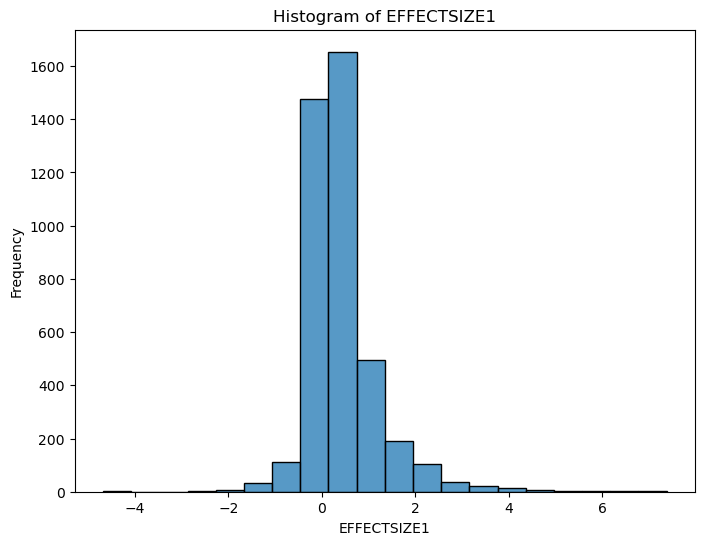

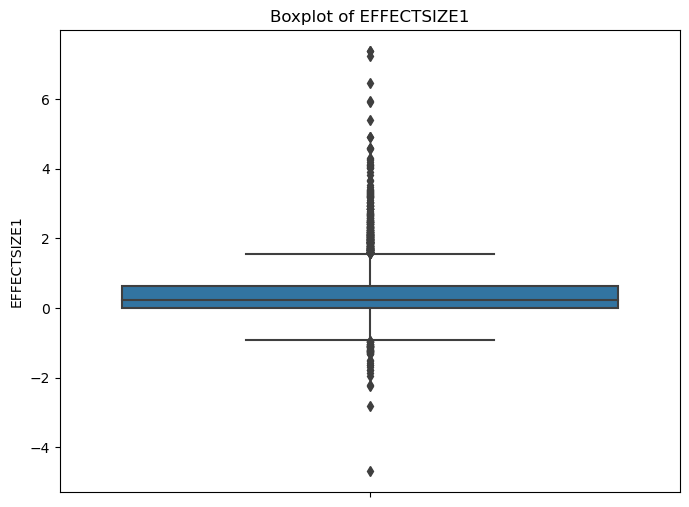

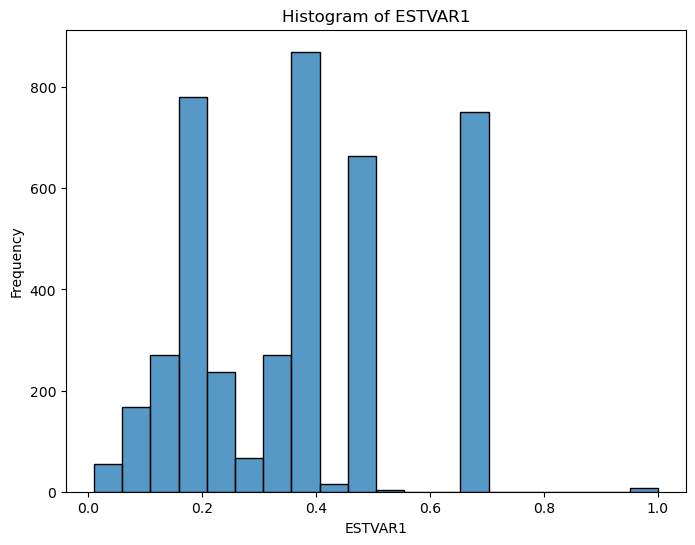

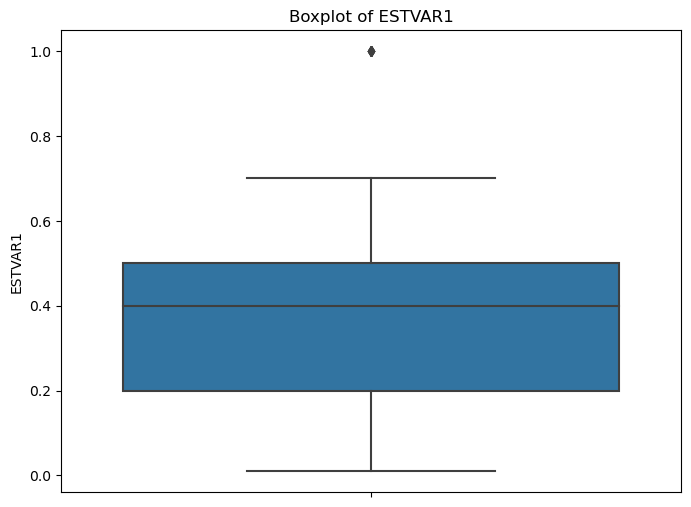

In [498]:
# Histograms and Boxplots
continuous_vars = ['EFFECTSIZE1', 'ESTVAR1']
for var in continuous_vars:
    plt.figure(figsize=(8, 6))
    sns.histplot(myco_data[var], bins=20)#, kde=True)
    plt.title(f'Histogram of {var}')
    plt.xlabel(var)
    plt.ylabel('Frequency')
    plt.show()

    plt.figure(figsize=(8, 6))
    sns.boxplot(data=myco_data, y=var)
    plt.title(f'Boxplot of {var}')
    plt.ylabel(var)
    plt.show()

# This code iterates over a list of continuous variables ('EFFECTSIZE1', 'ESTVAR1') and creates histograms and boxplots for each variable.
# For each variable, it first creates a histogram using seaborn's histplot() function. The histogram visualizes the distribution of values, with the number of bins set to 20 and a kernel density estimate (kde) overlay.
# Next, it displays the histogram with appropriate titles and axis labels using matplotlib.
# Then, it creates a boxplot using seaborn's boxplot() function. The boxplot shows the distribution of values, including median, quartiles, and potential outliers.
# Finally, it displays the boxplot with appropriate titles and axis labels using matplotlib.

# Interpretation:

# Histogram of EFFECTSIZE1: This histogram visualizes the distribution of effect sizes across studies. It helps assess whether effect sizes are symmetrically distributed around the mean and whether there are any outliers or skewness.
# Boxplot of EFFECTSIZE1: The boxplot provides a summary of the central tendency and spread of effect sizes. It shows the median (line inside the box), interquartile range (box), and potential outliers (points outside the whiskers).
# Histogram and Boxplot of ESTVAR1: These plots serve similar purposes for estimated variances as they do for effect sizes. They help assess the distribution and variability of estimated variances across studies.

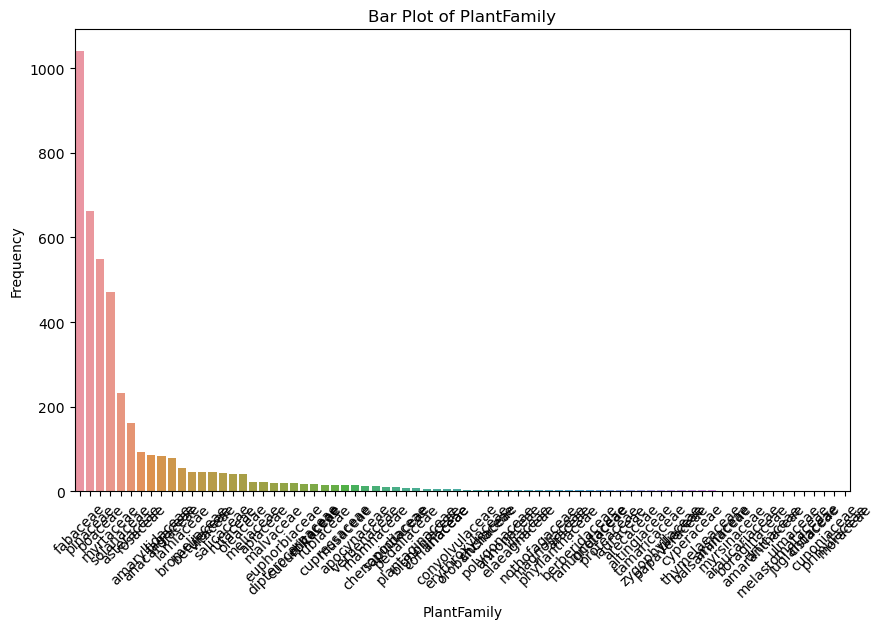

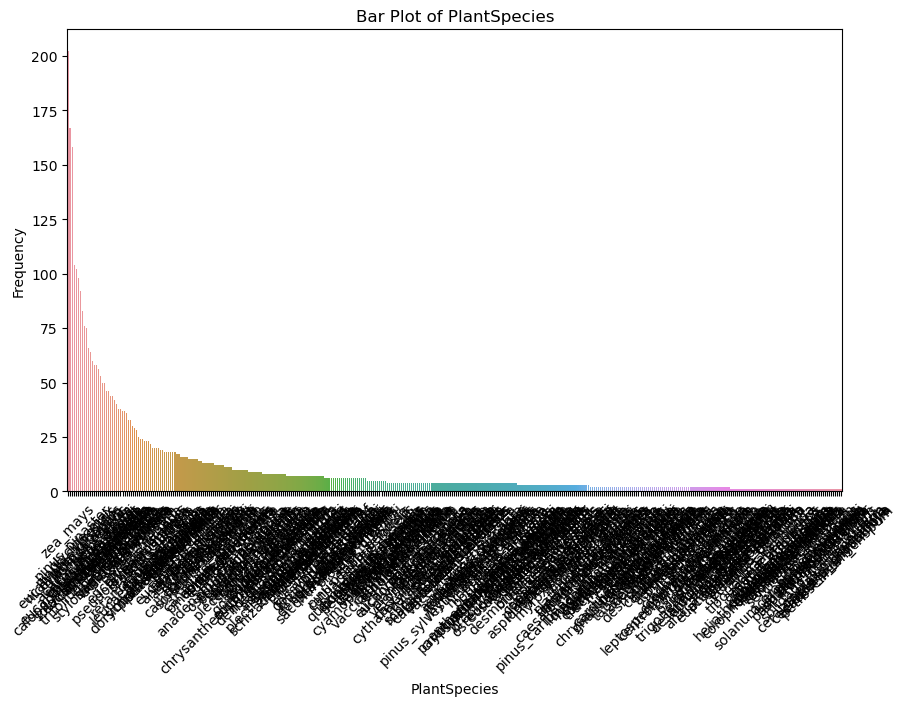

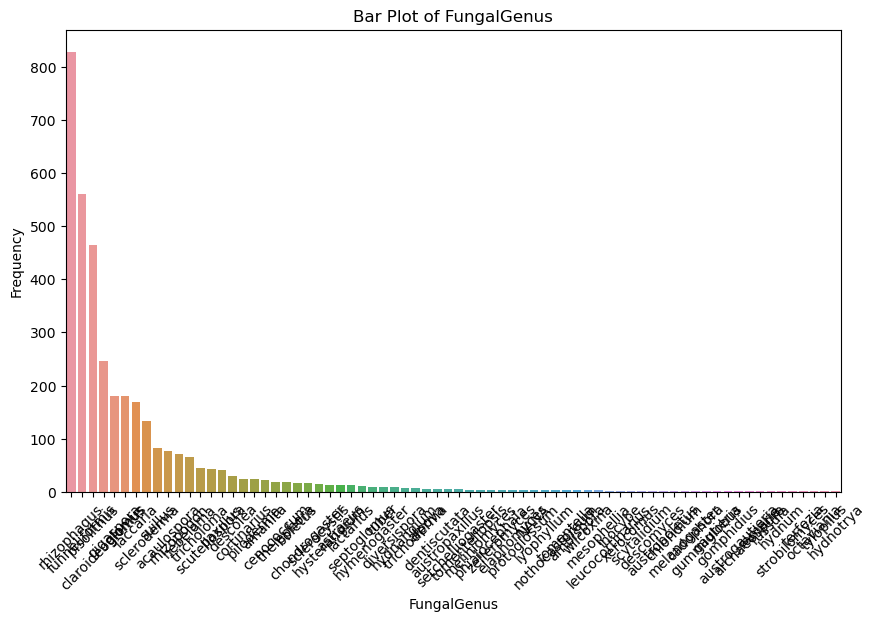

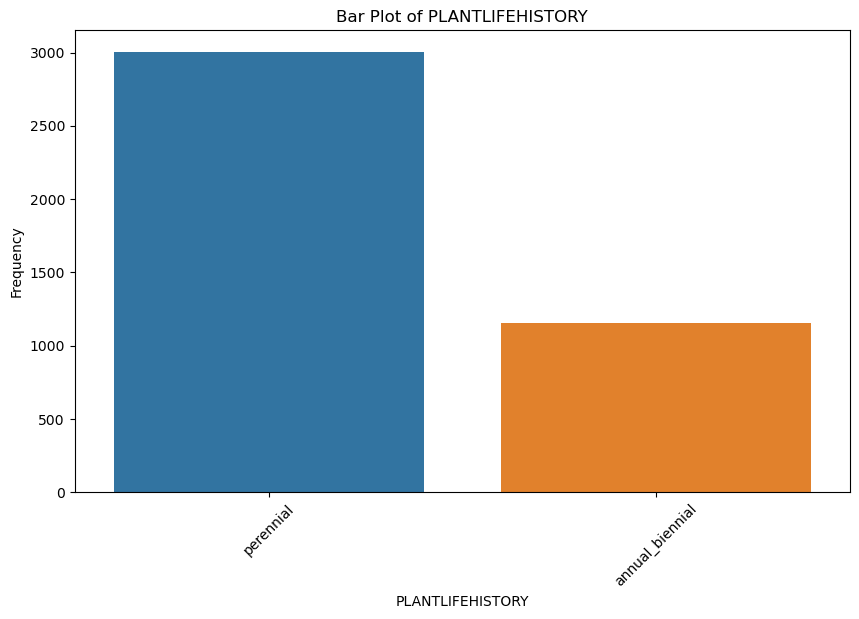

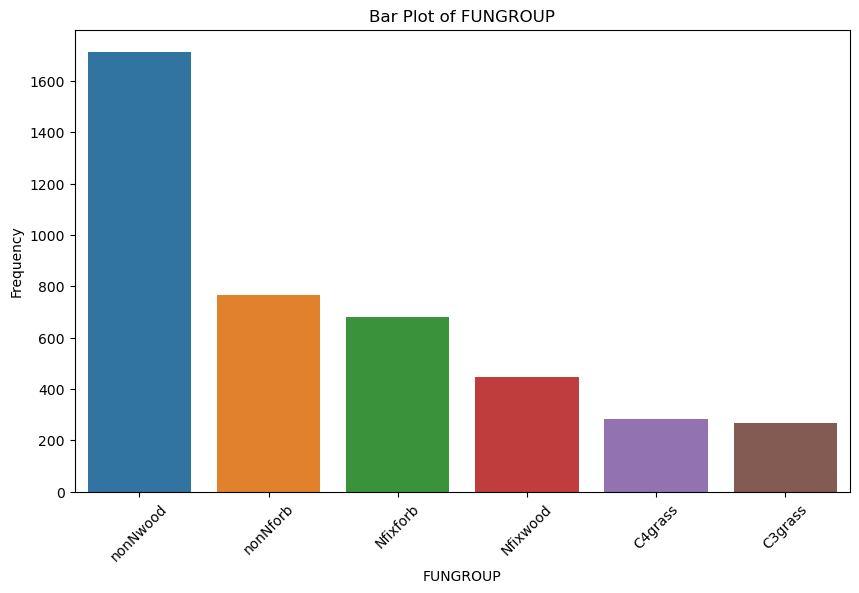

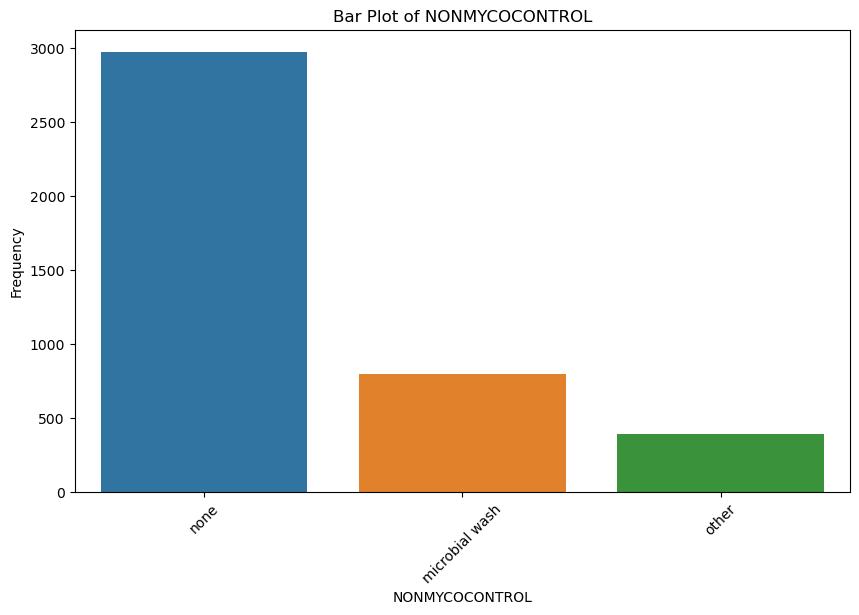

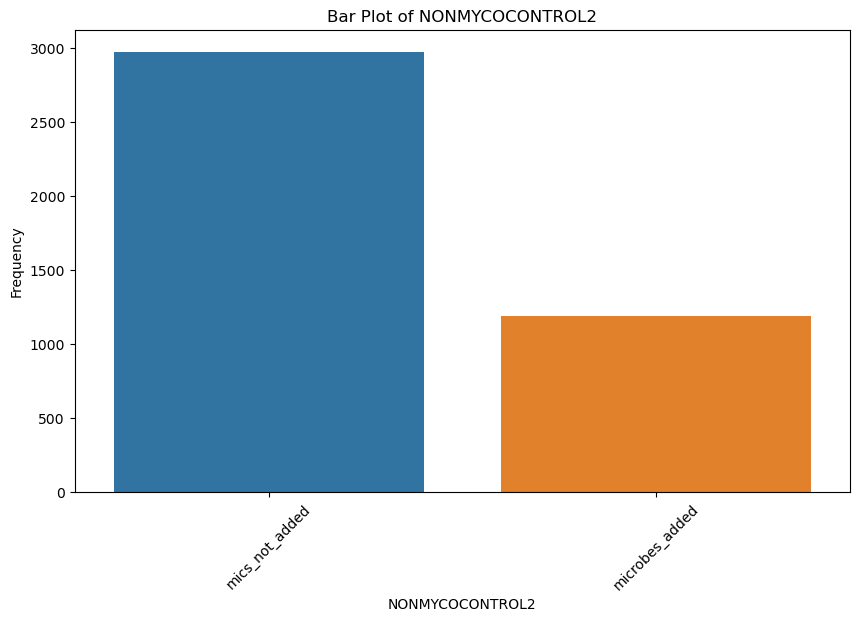

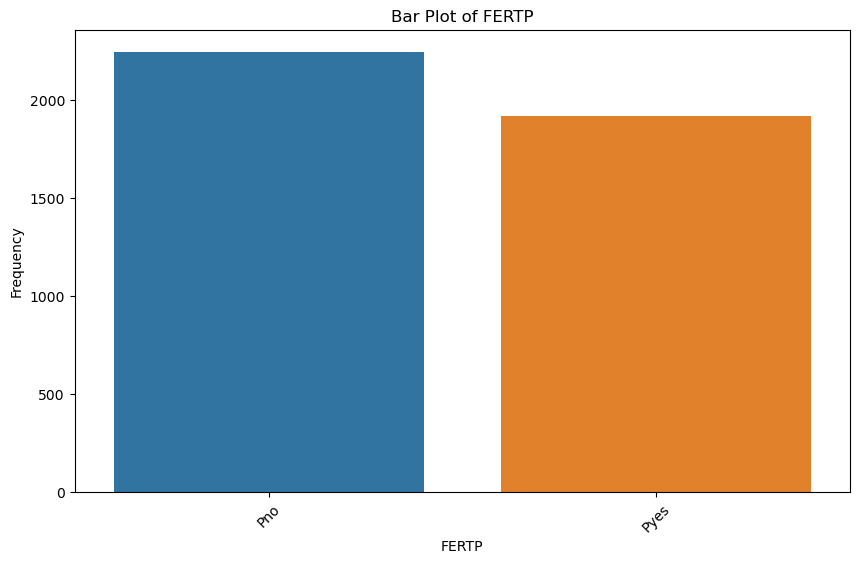

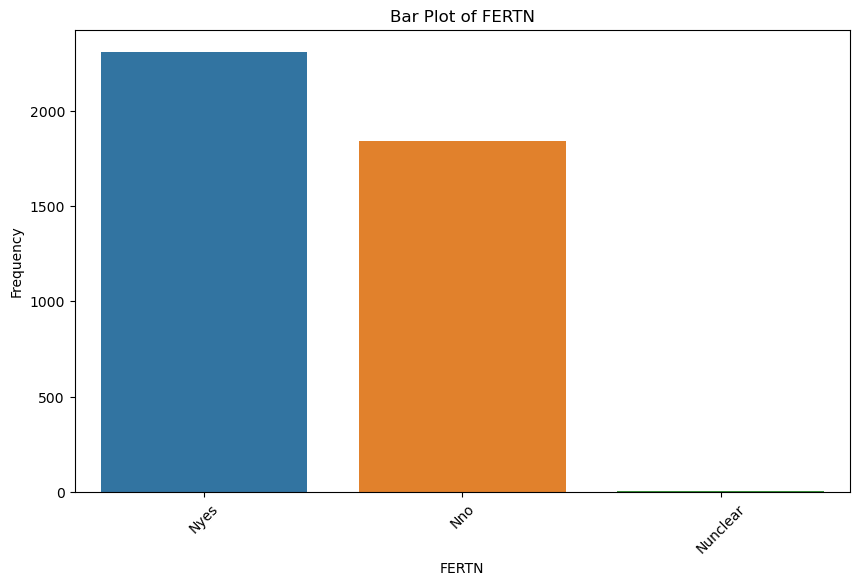

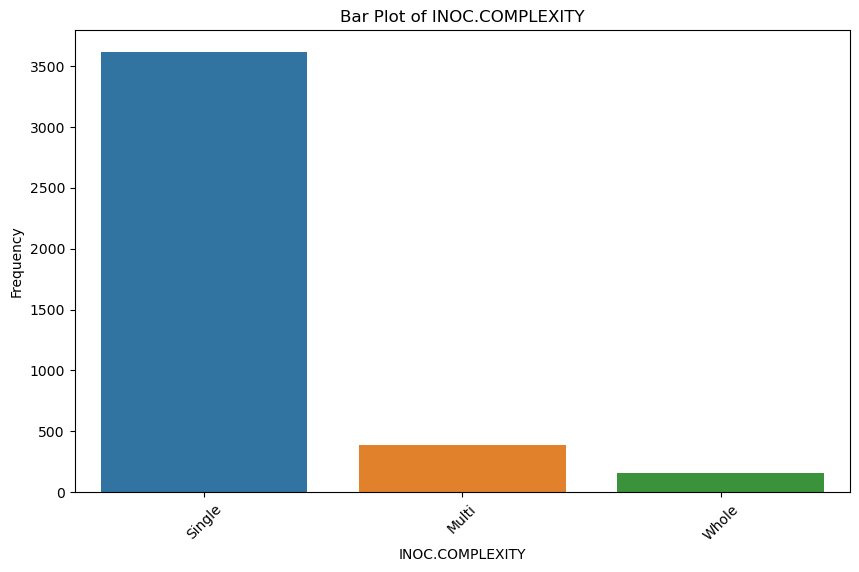

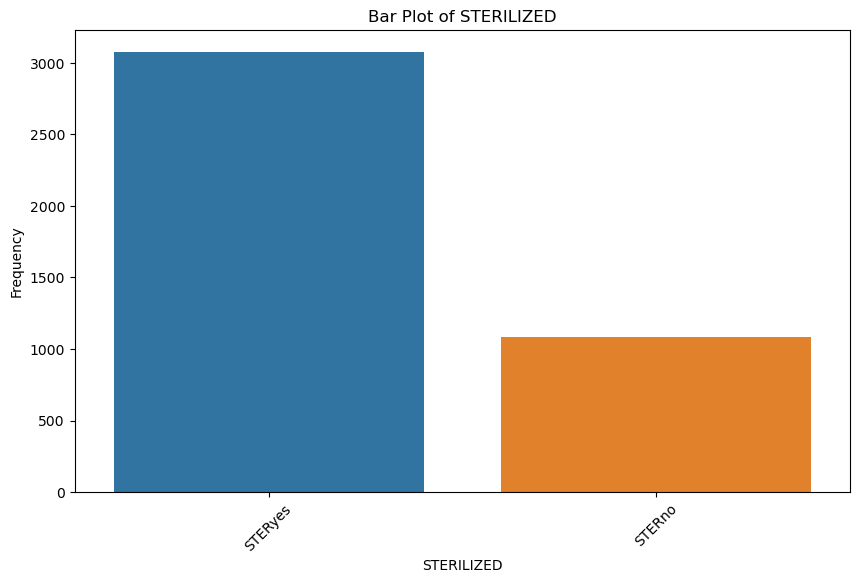

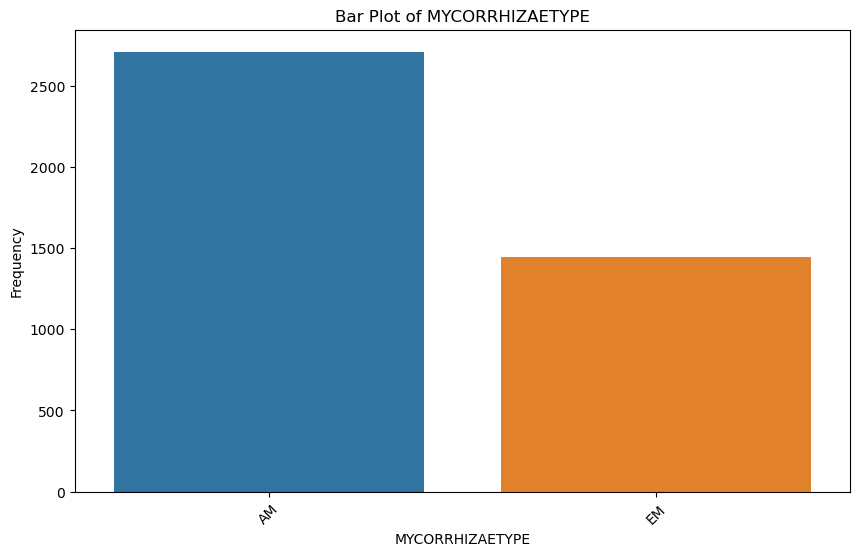

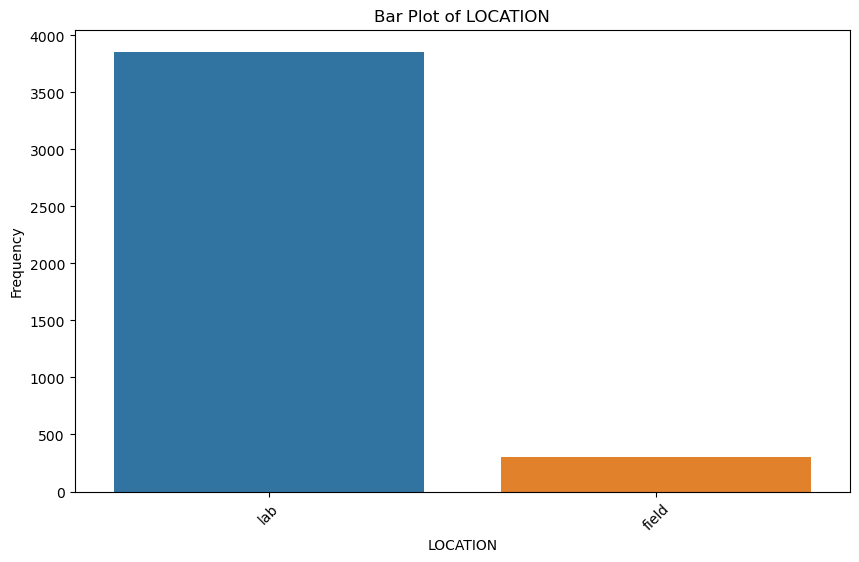

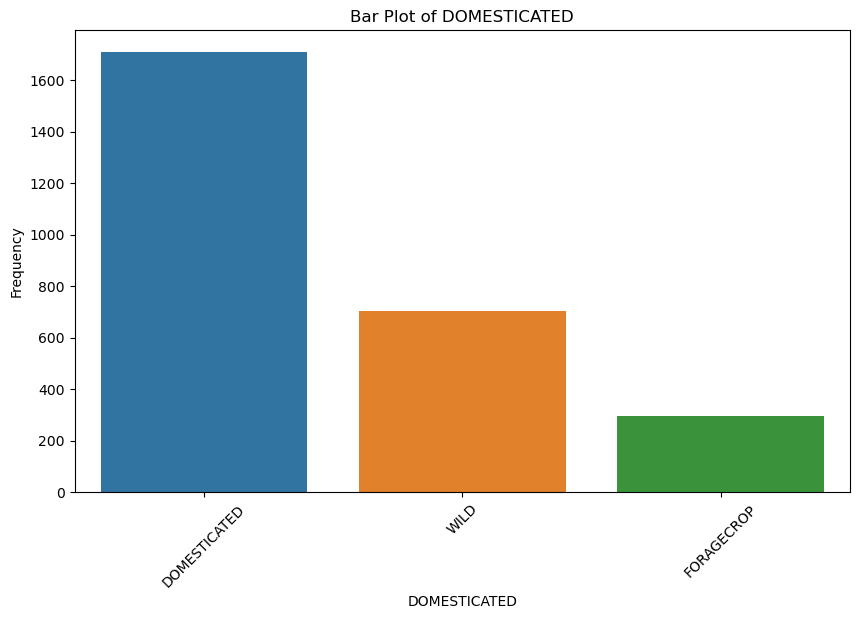

In [499]:
# Bar Plots
categorical_vars = ['PlantFamily','PlantSpecies', 'FungalGenus', 'PLANTLIFEHISTORY', 'FUNGROUP',
       'NONMYCOCONTROL', 'NONMYCOCONTROL2', 'FERTP', 'FERTN',
       'INOC.COMPLEXITY', 'STERILIZED', 'MYCORRHIZAETYPE', 'LOCATION',
       'DOMESTICATED']
for var in categorical_vars:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=myco_data, x=var, order=myco_data[var].value_counts().index)
    plt.title(f'Bar Plot of {var}')
    plt.xlabel(var)
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)
    plt.show()

## Data Analysis

### Calculating Average Percent Change in Plant Biomass (%)

In [500]:
# Calculate average percent change in plant biomass
myco_data['Percent Change in Plant Biomass (%)'] = ((myco_data['trt_mass'] - myco_data['ctrl_mass']) / myco_data['ctrl_mass']) * 100
print(myco_data)

      NONCTLTRTSETID  EXPERIMENTID  CTLTRTSETID LASTNAME1 LASTNAME2  \
0                 75             5           78    Medina  Probanza   
1                 76             5           78    Medina  Probanza   
2                 77             5           78    Medina  Probanza   
3                 79             5           82    Medina  Probanza   
4                 80             5           82    Medina  Probanza   
...              ...           ...          ...       ...       ...   
4576           16428          1535        15991  Lukesova    Kohout   
4577           16429          1536        15869     Sousa    Franco   
4578           16430          1536        15869     Sousa    Franco   
4579           16431          1536        15890     Sousa    Franco   
4580           16432          1536        15890     Sousa    Franco   

      PAPERYEAR             JOURNALNAME  \
0          2003    Applied Soil Ecology   
1          2003    Applied Soil Ecology   
2          2003   

In [501]:
# Calculate average percent change in plant biomass grouped by plant functional group and mycorrhizal type
average_change = myco_data.groupby(['FUNGROUP', 'MYCORRHIZAETYPE'])['Percent Change in Plant Biomass (%)'].mean()
# average_change = myco_data.groupby(['FUNGROUP', 'MYCORRHIZAETYPE'])['Average Percent Change'].mean()

print(average_change)

FUNGROUP  MYCORRHIZAETYPE
C3grass   AM                  79.030858
C4grass   AM                 132.160670
Nfixforb  AM                 167.002237
Nfixwood  AM                  97.623887
          EM                 101.281623
nonNforb  AM                 269.128049
          EM                   1.938006
nonNwood  AM                 281.381672
          EM                        NaN
Name: Percent Change in Plant Biomass (%), dtype: float64


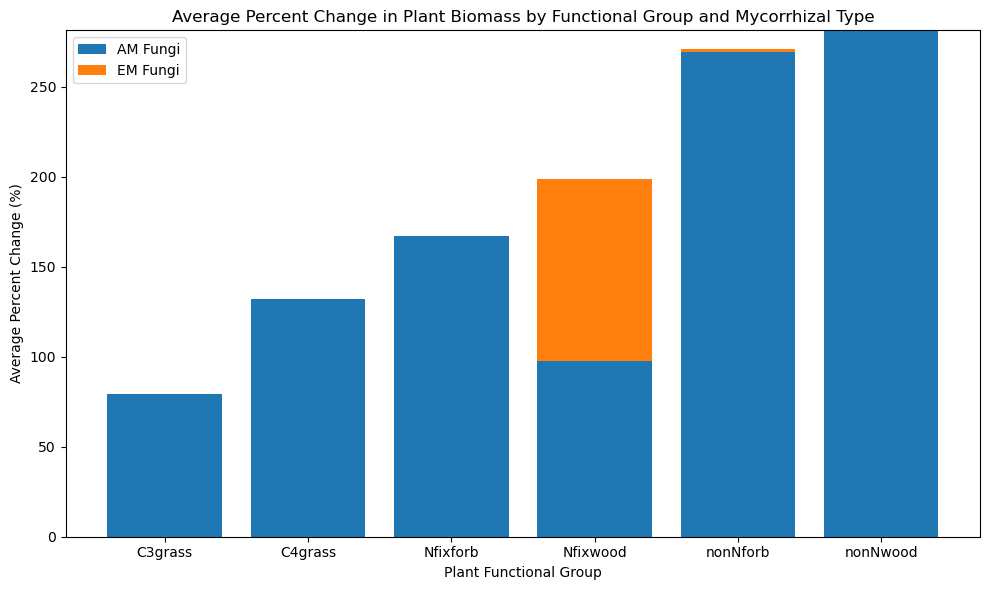

In [502]:
import matplotlib.pyplot as plt

# Data
functional_groups = ['C3grass', 'C4grass', 'Nfixforb', 'Nfixwood', 'nonNforb', 'nonNwood']
am_values = [79.03, 132.16, 167.00, 97.62, 269.13, 281.38]
em_values = [0, 0, 0, 101.28, 1.94, 0]  # Assuming 0 for missing EM values

# Fill NaN values with zeros
em_values = [0 if isinstance(val, float) and val != val else val for val in em_values]

# Create the figure and axes objects
fig, ax = plt.subplots(figsize=(10, 6))

# Plot stacked bars
ax.bar(functional_groups, am_values, label='AM Fungi')
ax.bar(functional_groups, em_values, bottom=am_values, label='EM Fungi')

# Set labels and title
ax.set_xlabel('Plant Functional Group')
ax.set_ylabel('Average Percent Change (%)')
ax.set_title('Average Percent Change in Plant Biomass by Functional Group and Mycorrhizal Type')
ax.legend()

# Show the chart
plt.tight_layout()
plt.show()


In [503]:
# Calculate average change grouped by plant functional group and mycorrhizal type
average_change = myco_data.groupby(['FUNGROUP', 'FungalGenus'])['Percent Change in Plant Biomass (%)'].mean()

print(average_change)

FUNGROUP  FungalGenus    
C3grass   acaulospora        -19.831224
          claroideoglomus     12.523180
          funneliformis      211.371683
          gigaspora          -41.043253
          glomus             295.256154
                                ...    
nonNwood  tuber               60.057502
          tylopilus           88.235294
          wilcoxina           -1.145038
          xerocomus           30.804899
          zelleromyces        36.199095
Name: Percent Change in Plant Biomass (%), Length: 122, dtype: float64


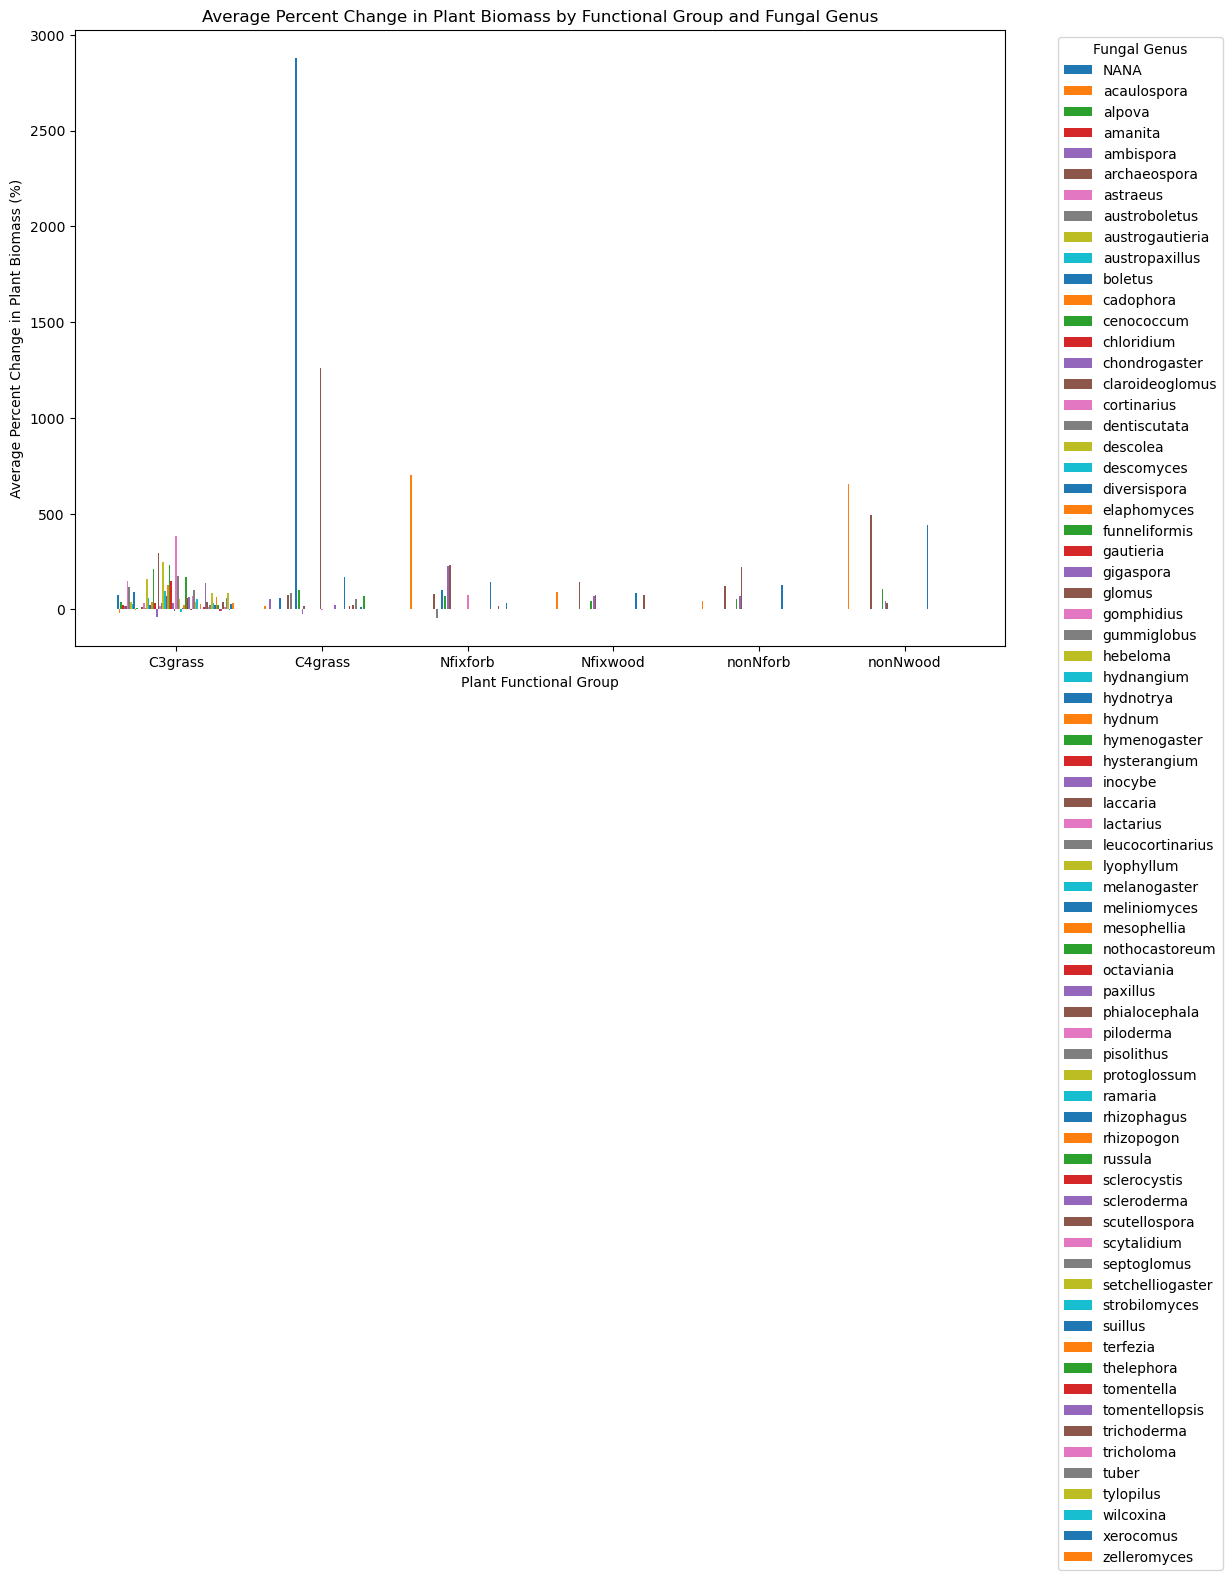

In [504]:
import mplcursors  # Import mplcursors for interactivity

# Drop NaN values from 'FungalGenus' column
myco_data_cleaned = myco_data.dropna(subset=['FungalGenus'])

# Data
functional_groups = sorted(myco_data_cleaned['FUNGROUP'].unique())
fungal_genera = sorted(myco_data_cleaned['FungalGenus'].unique())

# Initialize lists to store average percent change values for each fungal genus
avg_percent_change_by_genus = {genus: [] for genus in fungal_genera}

# Extract average percent change values for each fungal genus
for group, genus in average_change.index:
    avg_percent_change_by_genus[genus].append(average_change[group, genus])

# Fill missing values with zeros
for genus in fungal_genera:
    if len(avg_percent_change_by_genus[genus]) < len(functional_groups):
        avg_percent_change_by_genus[genus].extend([0] * (len(functional_groups) - len(avg_percent_change_by_genus[genus])))

# Create the figure and axes objects
fig, ax = plt.subplots(figsize=(12, 8))

# Plot grouped bars for each fungal genus within each functional group
bar_width = 0.8 / len(fungal_genera)  # Width of each bar

for i, genus in enumerate(fungal_genera):
    x = [j + i * bar_width for j in range(len(functional_groups))]
    bars = ax.bar(x, avg_percent_change_by_genus[genus], width=bar_width, label=genus)

# Set labels and title
ax.set_xlabel('Plant Functional Group')
ax.set_ylabel('Average Percent Change in Plant Biomass (%)')
ax.set_title('Average Percent Change in Plant Biomass by Functional Group and Fungal Genus')
ax.set_xticks([i + 0.4 for i in range(len(functional_groups))])
ax.set_xticklabels(functional_groups)
ax.legend(title='Fungal Genus', bbox_to_anchor=(1.05, 1), loc='upper left')

# Add tooltips displaying the fungal genus when hovering over each bar
mplcursors.cursor(bars, hover=True).connect("add", lambda sel: sel.annotation.set_text(f'Genus: {sel.artist.get_label()}'))

# Show the chart
plt.tight_layout()
plt.show()

figure out how to create a general overview for each functional group, then when you click on it it will expand to view more details

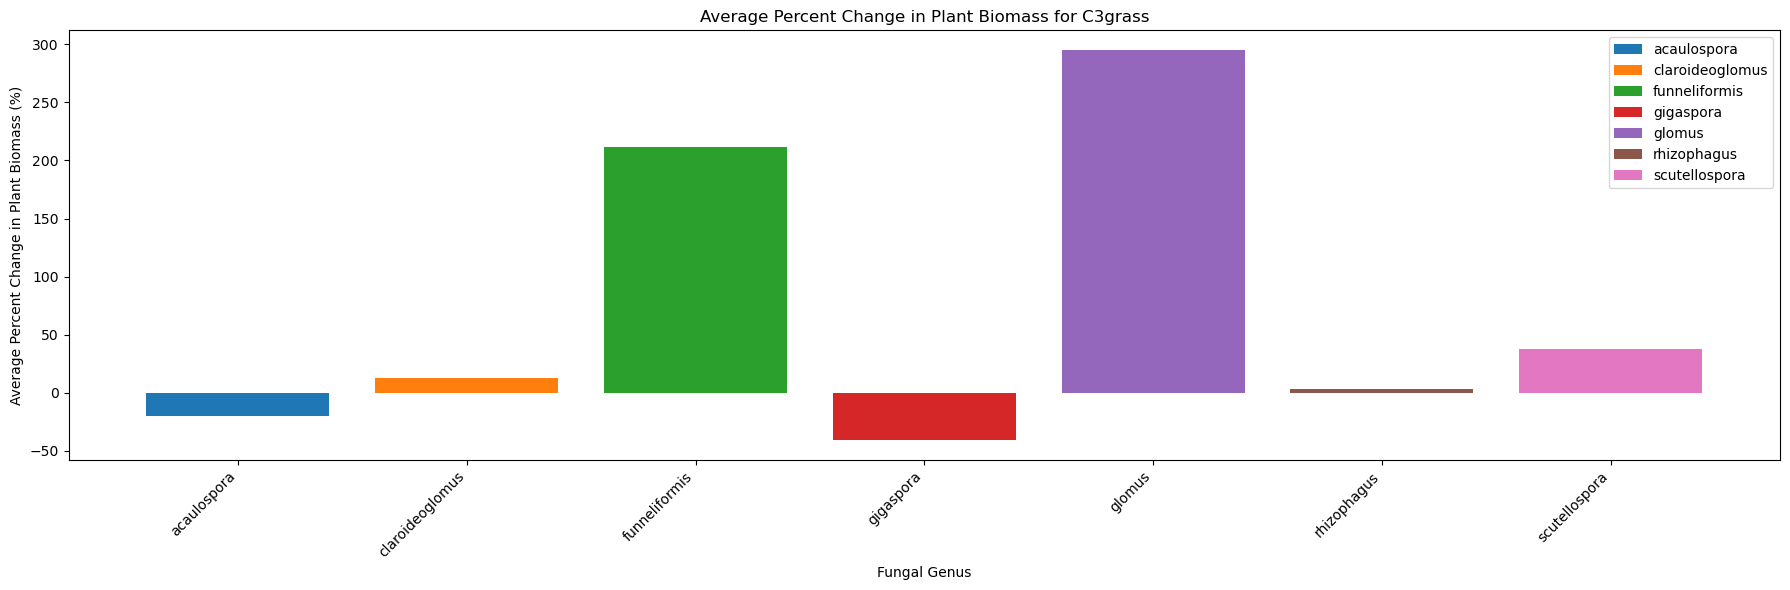

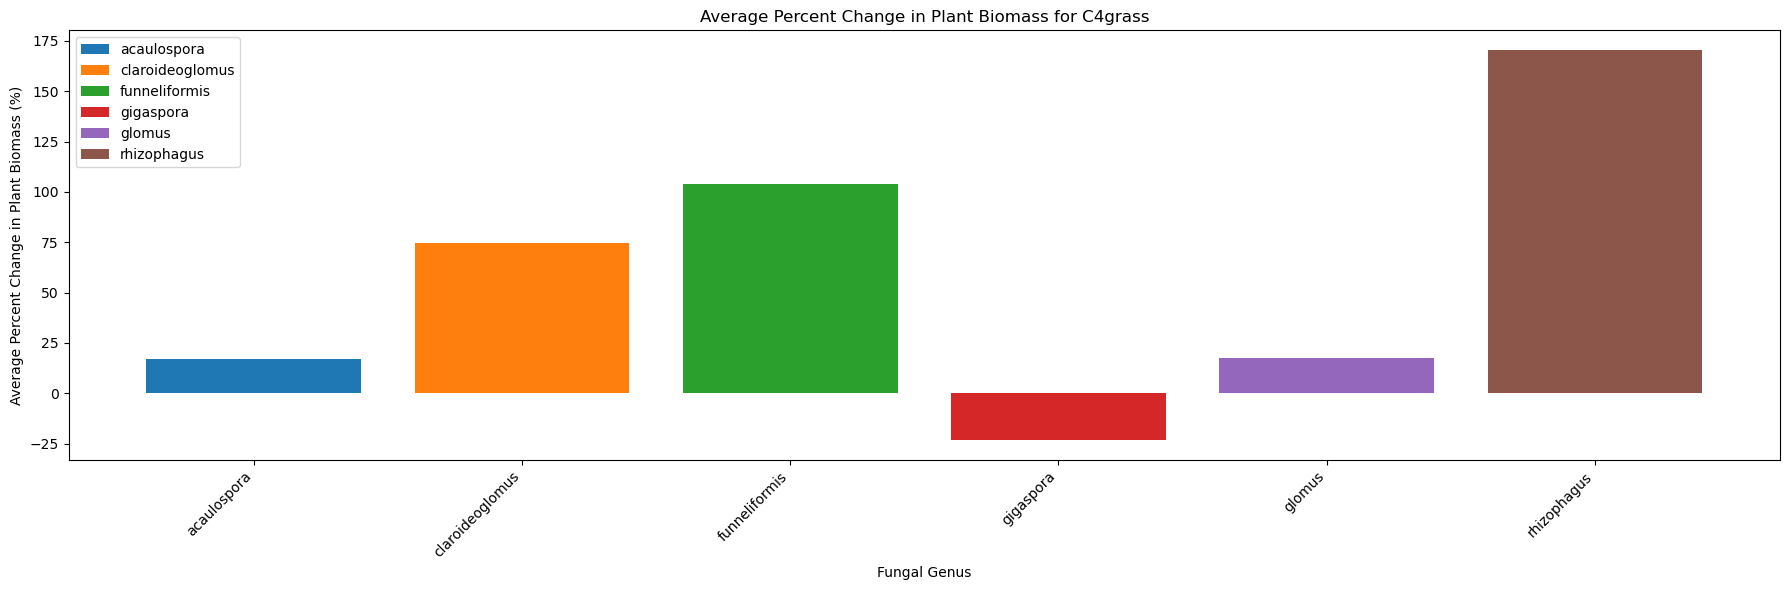

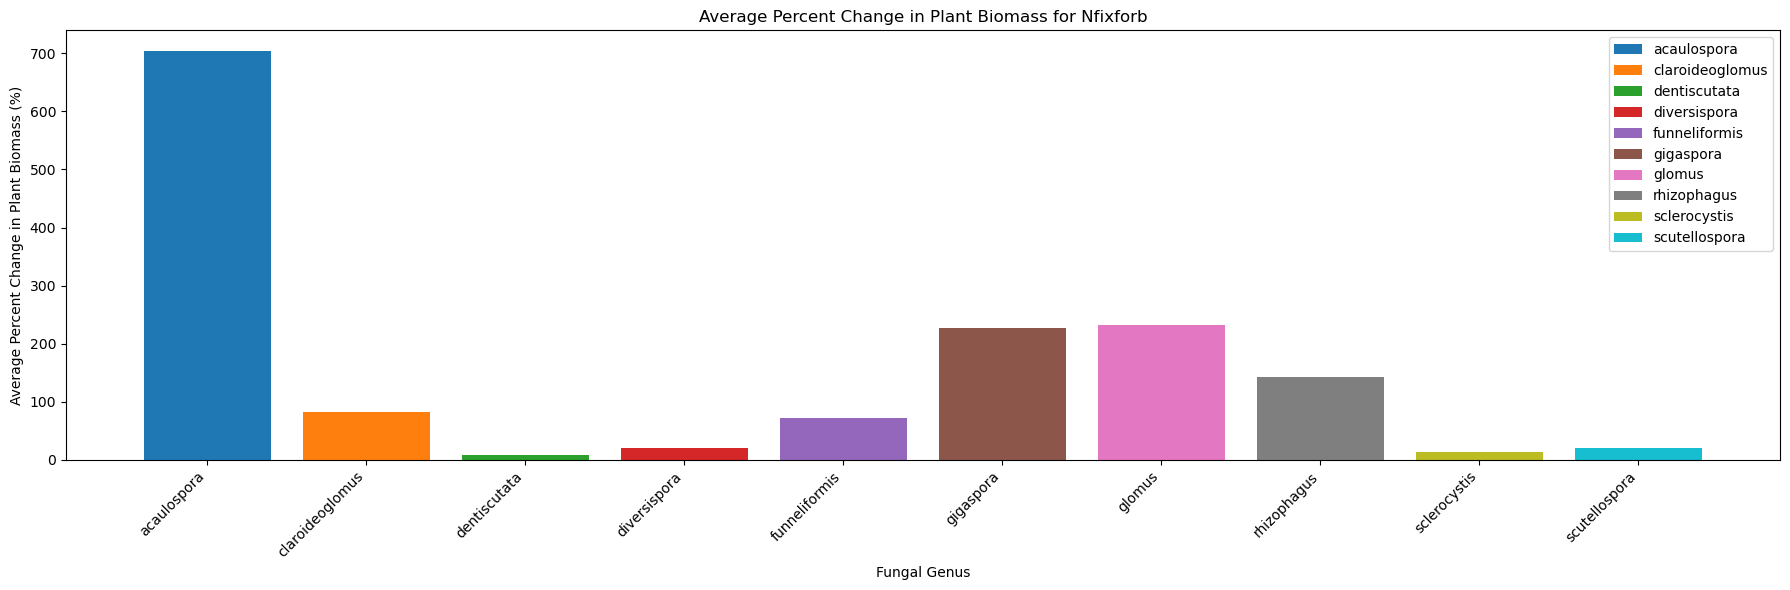

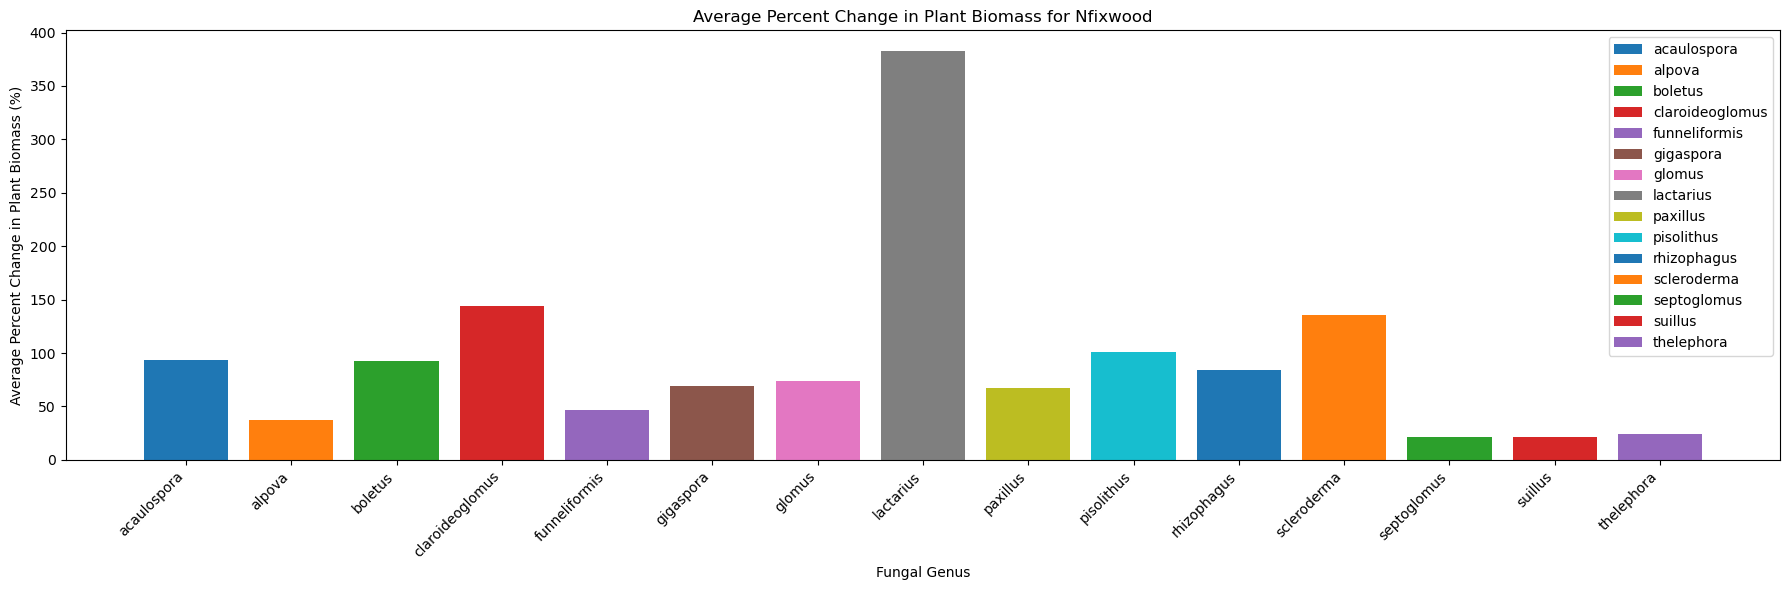

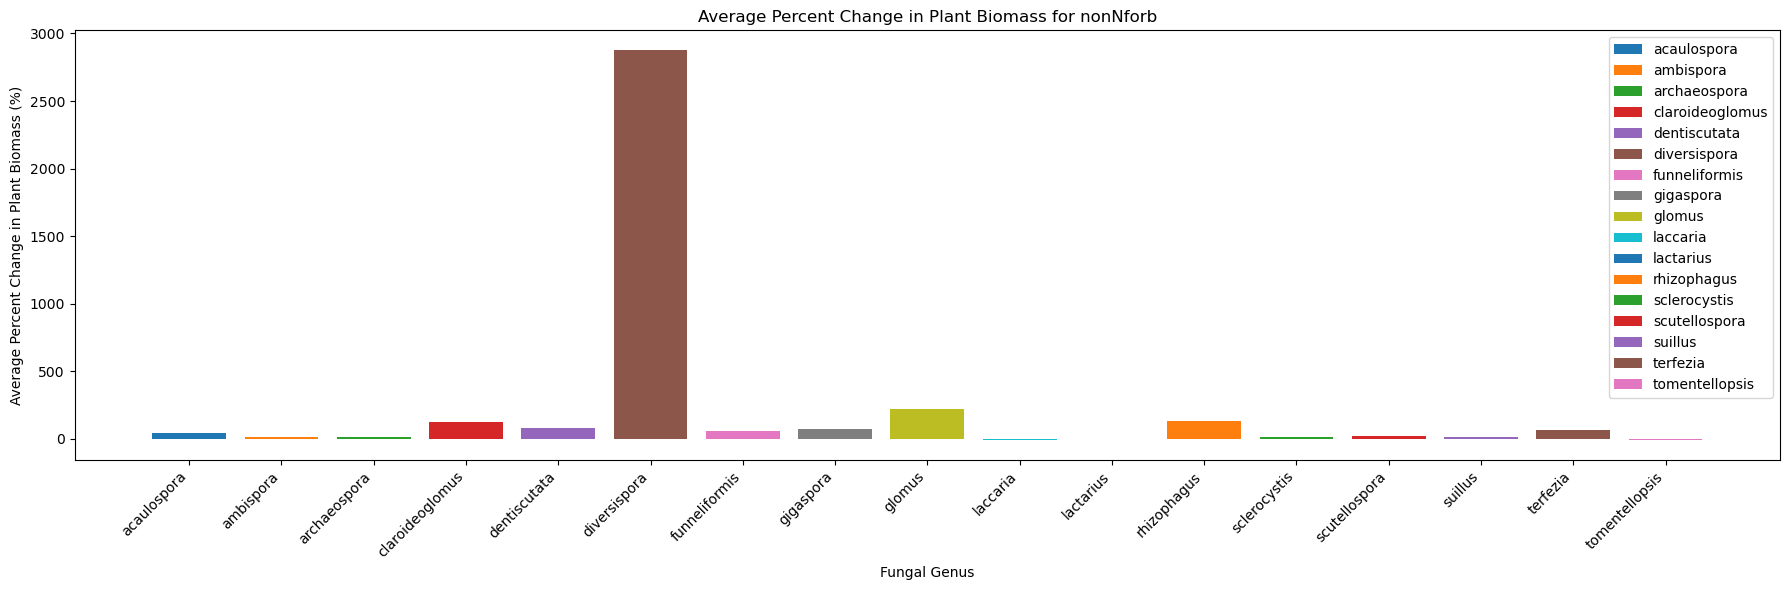

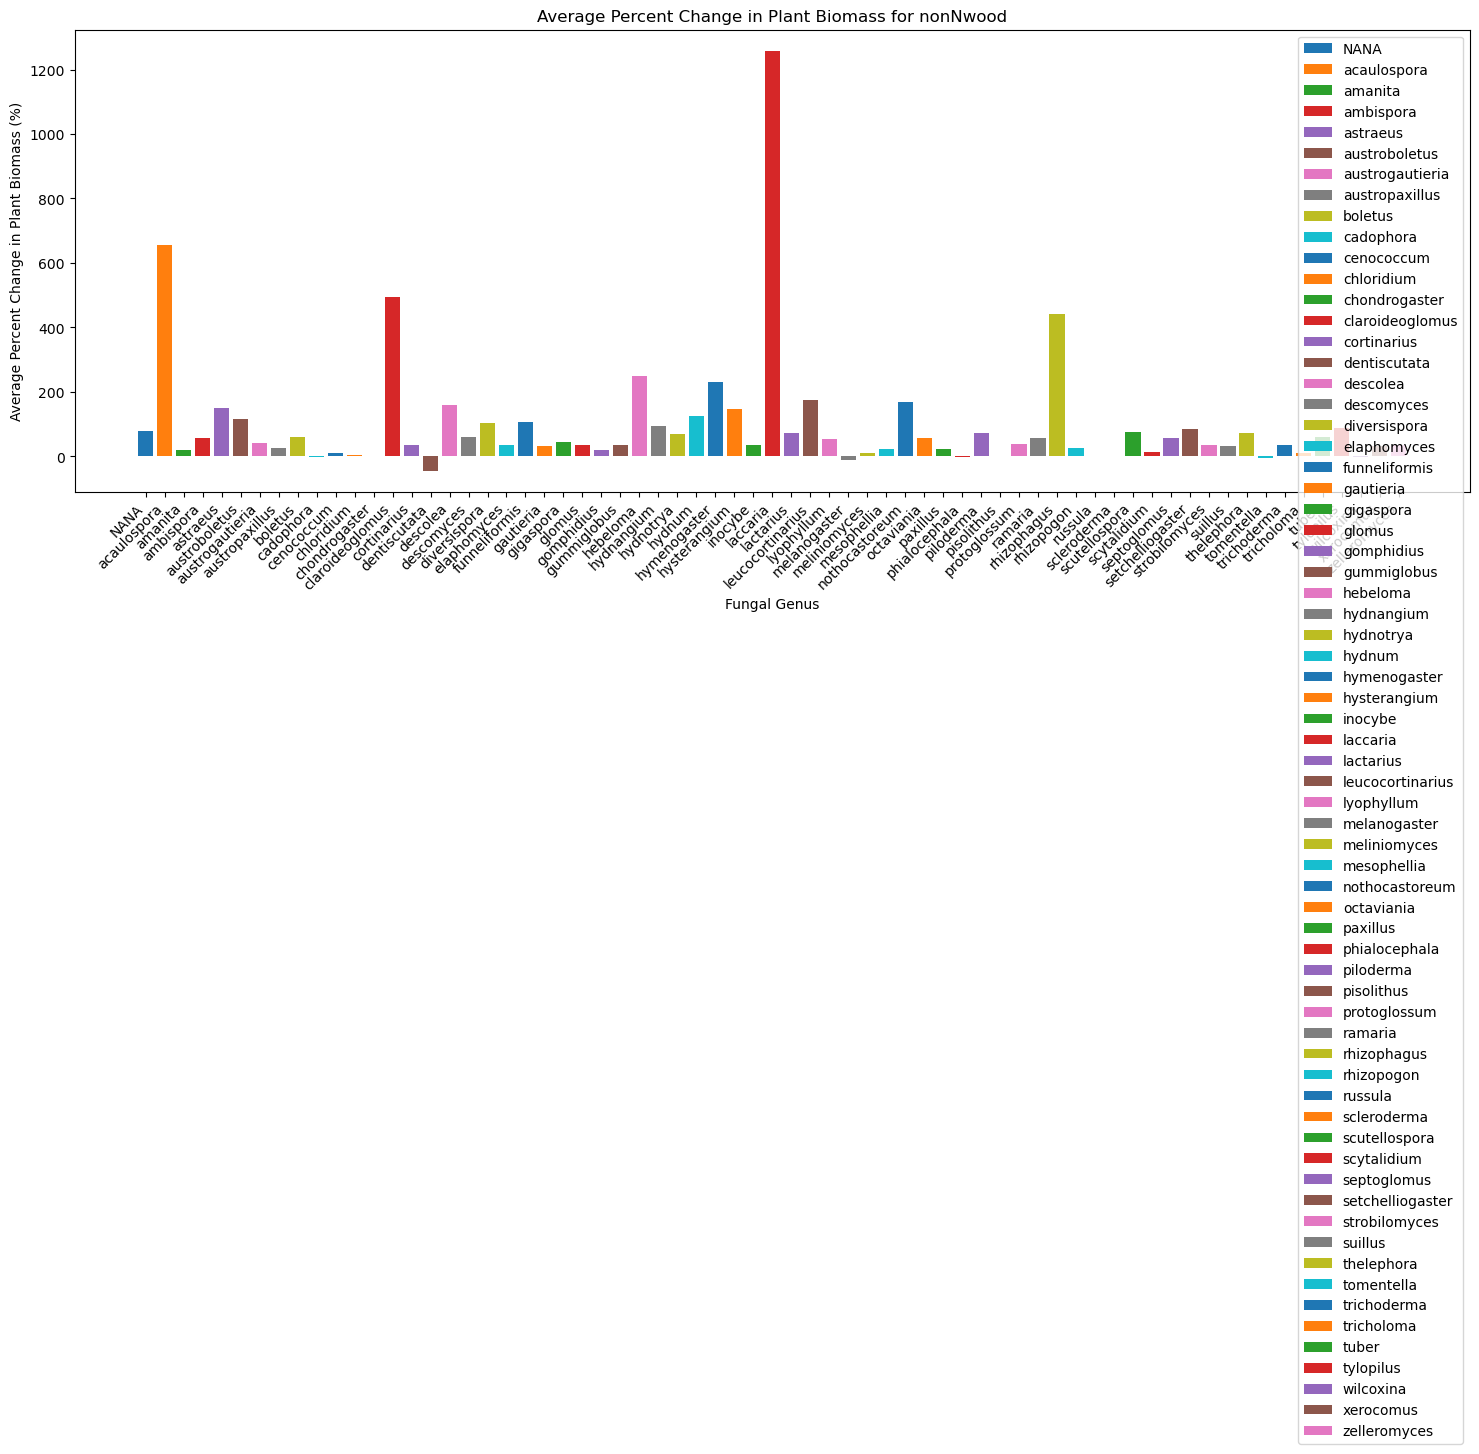

In [505]:
import matplotlib.pyplot as plt
import numpy as np

# Drop NaN values from 'FungalGenus' column
myco_data_cleaned = myco_data.dropna(subset=['FungalGenus'])

# Data
functional_groups = sorted(myco_data_cleaned['FUNGROUP'].unique())
fungal_genera = sorted(myco_data_cleaned['FungalGenus'].unique())

# Create separate charts for each functional group
for group in functional_groups:
    # Filter data for the current functional group
    group_data = average_change.loc[group]

    # Initialize the plot
    plt.figure(figsize=(18, 6))

    # Iterate over fungal genera
    for genus in fungal_genera:
        # Check if the current genus exists for the current functional group
        if genus in group_data:
            # Plot the bar for the current genus
            plt.bar(genus, group_data[genus], label=genus)

    # Add labels and title
    plt.xlabel('Fungal Genus')
    plt.ylabel('Average Percent Change in Plant Biomass (%)')
    plt.title(f'Average Percent Change in Plant Biomass for {group}')
    
    # Add legend
    plt.legend()

    # Show the plot
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()


## Conducting a Meta-Analysis of MycoDB

In [506]:
myco_data.columns

Index(['NONCTLTRTSETID', 'EXPERIMENTID', 'CTLTRTSETID', 'LASTNAME1',
       'LASTNAME2', 'PAPERYEAR', 'JOURNALNAME', 'PAPERTITLE', 'EFFECTSIZE1',
       'ESTVAR1', 'ctrl_mass', 'ctrl_reps', 'trt_mass', 'trt_reps',
       'PlantFamily', 'PlantSpecies', 'FungalGenus', 'PLANTLIFEHISTORY',
       'FUNGROUP', 'NONMYCOCONTROL', 'NONMYCOCONTROL2', 'FERTP', 'FERTN',
       'INOC.COMPLEXITY', 'STERILIZED', 'MYCORRHIZAETYPE', 'LOCATION',
       'DOMESTICATED', 'Loc_Ad_appropriate', 'LA_Code', 'Plant_Lat',
       'Plant_Long', 'Fung_Lat', 'Fung_Long', 'Soil_Lat', 'Soil_Long',
       'AM_single_genus', 'EM_single_genus',
       'Percent Change in Plant Biomass (%)'],
      dtype='object')

In [507]:
print(myco_data['ESTVAR1'])

0       0.400000
1       0.400000
2       0.400000
3       0.400000
4       0.400000
          ...   
4576    0.333333
4577    0.125000
4578    0.125000
4579    0.125000
4580    0.125000
Name: ESTVAR1, Length: 4158, dtype: float64


In [508]:
print(myco_data['ESTVAR1'].min())
print(myco_data['ESTVAR1'].max())

0.01
1.0


"The underlying null hypothesis assumes that the true treatment effect is the same across studies and variations are simply caused by chance." https://www.ncbi.nlm.nih.gov/books/NBK53317/table/ch3.t2/

In [509]:
#σ^2 = 'ESTVAR1' column in myco_data (within-study variance)
sigma_squared = np.array(myco_data['ESTVAR1'])

#Calculate inverse variance
#weights_fe = weighting factor for ith study (fixed effects model)
weights_fe = 1 / sigma_squared
c = np.sum(weights_fe) - (np.sum(weights_fe**2) / np.sum(weights_fe))

effect_estimate = np.array(myco_data['EFFECTSIZE1'])
mean_effect_size_fe = np.sum(weights_fe * effect_estimate) / np.sum(weights_fe)

# Calculate Cochran's Q statistic (chi^2 statistic)
Q = np.sum(weights_fe * (effect_estimate - mean_effect_size_fe)**2)

#k is the number of studies 
k = len(myco_data['NONCTLTRTSETID'])

# Degrees of freedom
df = k - 1  

# Determine critical value from chi-squared distribution
alpha = 0.05
critical_value = chi2.ppf(1 - alpha, df)

# Compare Q statistic to critical value
if Q > critical_value:
    print("Reject null hypothesis: There is statistically significant between-studies variation.")
else:
    print("Fail to reject null hypothesis: There is no statistically significant between-studies variation.")

Reject null hypothesis: There is statistically significant between-studies variation.


In [510]:
if Q > df:
    I_squared = ((Q - df) / Q) * 100 # Calculate I^2 index
    tau_squared = (Q - df) / c #Calculate τ^2 (between-study variance)
else: 
    I_squared = 0
    tau_squared = 0

# I_squared = c * tau_squared / Q
#"I2 describes the percentage of the variability in effect estimates that is due to heterogeneity rather than sampling error (chance)"
    #"indicates the proportion of the total variation that is due to between-study differences"
print("I^2 Index:", I_squared, "%")
print("Between-study variance:", tau_squared)

I^2 Index: 58.12570537266893 %
Between-study variance: 0.34871565169904845


In [511]:
# Based on criteria, decide whether to use fixed-effects or random-effects model
if I_squared < 50:
    model_type = 'fixed'
    print("Since I^2 is less than 50%, I will be using the fixed-effects model.")
else:
    model_type = 'random'
    print("Since I^2 is greater than 50%, this means there is high heterogeneity. Thus, I will be using the random-effects model.")

Since I^2 is greater than 50%, this means there is high heterogeneity. Thus, I will be using the random-effects model.


## Inverse Variance Random-Effects Model Approach to Meta-Analysis

In [512]:
# Calculate standard error (SEi) of the effect size estimate for each study (sqrt of within-study variance)
myco_data['SEi'] = np.sqrt(myco_data['ESTVAR1'])

# Calculate confidence interval (CIi) for the effect size estimate for each study
z_score = 1.96  # For a 95% confidence interval
myco_data['CI_lower'] = myco_data['EFFECTSIZE1'] - z_score * myco_data['SEi']
myco_data['CI_upper'] = myco_data['EFFECTSIZE1'] + z_score * myco_data['SEi']

# Calculate confidence interval range (CI upper limit - CI lower limit)
#doing this in order to be able to create a forest plot in Tableau
myco_data['CI_range'] = myco_data['CI_upper'] - myco_data['CI_lower']

# Perform meta-analysis to calculate overall effect size
if model_type == 'fixed':
    overall_effect_size = mean_effect_size_fe
else:
    weights_re = 1 / (tau_squared + sigma_squared) #weighting factor for ith study (random-effects model)
    mean_effect_size_re = np.sum(weights_re * effect_estimate) / np.sum(weights_re)
    # Q2 = np.sum(weights_re * (effect_estimate - mean_effect_size_re)**2)
    # c = np.sum(weights_re) - (np.sum(weights_re**2) / np.sum(weights_re))
    # tau_squared = (Q2 - df) / c
    overall_effect_size = mean_effect_size_re


print("Overall Effect Size:", overall_effect_size)

Overall Effect Size: 0.41395263215450984


In [513]:
# Calculate standard error (SEt) for overall effect size
#the standard error for the overall effect size in the random-effects model is calculated by incorporating both the within-study variances and the between-studies variance
if model_type == 'fixed':
    SEt = np.sqrt(np.sum(1 / sigma_squared))
else:
    # SEt = np.sqrt(np.sum(1 / (sigma_squared + tau_squared)))
    SEt = np.sqrt(np.mean(sigma_squared) + tau_squared)
        #For the random-effects model, the standard error needs to account for both within-study variances and the between-studies variance

#Calculate confidence interval (CI) for overall effect size
    #0.975 is derived from the standard normal distribution and corresponds to the two-tailed critical value for a 95% confidence interval
    #critical Z-score for a 95% confidence interval is 1.96
# Calculate confidence interval (CI) for overall effect size
overall_CI_lower = overall_effect_size - z_score * SEt
overall_CI_upper = overall_effect_size + z_score * SEt

# print("Confidence Interval (Lower):", myco_data['CI_lower'])
# print("Confidence Interval (Upper):", myco_data['CI_upper'])
print("Overall Confidence Interval (Lower):", overall_CI_lower)
print("Overall Confidence Interval (Upper):", overall_CI_upper)


Overall Confidence Interval (Lower): -1.2556718595851866
Overall Confidence Interval (Upper): 2.083577123894206


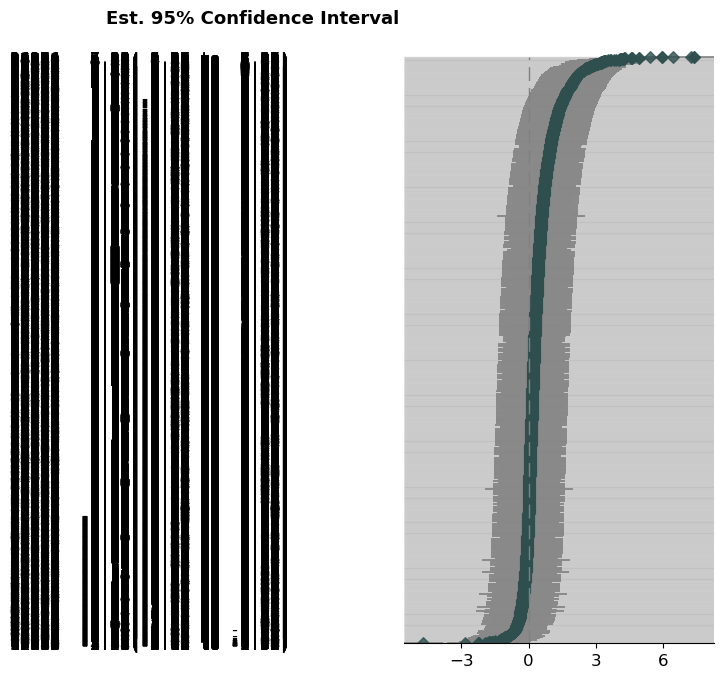

In [514]:
#convert study ID column to string data type so it can be used as the varaible label in the forest plot function
myco_data['NONCTLTRTSETID'] = myco_data['NONCTLTRTSETID'].astype(str)

fp.forestplot(myco_data,  # the dataframe with results data
              estimate="EFFECTSIZE1",  # col containing estimated effect size 
              ll="CI_lower", hl="CI_upper",  # columns containing conf. int. lower and higher limits
              color_alt_rows=True,  # Gray alternate rows
              varlabel="NONCTLTRTSETID",  # column containing variable label
              ylabel="Est. 95% Confidence Interval",  # y-label title
              sort=True,  # sort estimates in ascending order
              table=True,  # Format as a table
              # Additional kwargs for customizations
              **{"marker": "D",  # set maker symbol as diamond
                 "markersize": 35,  # adjust marker size
                 "xlinestyle": (0, (10, 5)),  # long dash for x-reference line 
                 "xlinecolor": "#808080",  # gray color for x-reference line
                 "xtick_size": 12,  # adjust x-ticker fontsize
                }  
              )
plt.show()

#also add a variable for the weight of each study and communicate the weight in number & size of the diamonds

In [515]:
print(myco_data[['NONCTLTRTSETID', 'EFFECTSIZE1', 'CI_lower', 'CI_upper', 'SEi']])

     NONCTLTRTSETID  EFFECTSIZE1  CI_lower  CI_upper       SEi
0                75     2.242767  1.003154  3.482380  0.632456
1                76     1.953157  0.713544  3.192770  0.632456
2                77     1.274915  0.035302  2.514528  0.632456
3                79     2.419684  1.180071  3.659297  0.632456
4                80     1.880163  0.640550  3.119776  0.632456
...             ...          ...       ...       ...       ...
4576          16428     0.923164 -0.208443  2.054770  0.577350
4577          16429     0.701694  0.008730  1.394659  0.353553
4578          16430     0.945891  0.252927  1.638856  0.353553
4579          16431     0.022990 -0.669975  0.715954  0.353553
4580          16432    -0.428996 -1.121960  0.263969  0.353553

[4158 rows x 5 columns]


In [516]:
print(myco_data)

     NONCTLTRTSETID  EXPERIMENTID  CTLTRTSETID LASTNAME1 LASTNAME2  PAPERYEAR  \
0                75             5           78    Medina  Probanza       2003   
1                76             5           78    Medina  Probanza       2003   
2                77             5           78    Medina  Probanza       2003   
3                79             5           82    Medina  Probanza       2003   
4                80             5           82    Medina  Probanza       2003   
...             ...           ...          ...       ...       ...        ...   
4576          16428          1535        15991  Lukesova    Kohout       2015   
4577          16429          1536        15869     Sousa    Franco       2015   
4578          16430          1536        15869     Sousa    Franco       2015   
4579          16431          1536        15890     Sousa    Franco       2015   
4580          16432          1536        15890     Sousa    Franco       2015   

                 JOURNALNAM

In [517]:
# determining the name of the file
cleaned_mycodata_excel = 'cleaned_mycodata.xlsx'
 
# saving the excel file
myco_data.to_excel(cleaned_mycodata_excel)

## Conducting Subgroup Analyses

In [518]:
import numpy as np
from scipy.stats import chi2

# Group data by 'FungalGenus'
subgroups = myco_data.groupby(['FungalGenus'])

for subgroup_name, subgroup_data in subgroups:
    # Calculate within-study variance (sigma squared)
    sigma_squared = np.array(subgroup_data['ESTVAR1'])
    
    # Calculate inverse variance weights for fixed-effects model
    weights_fe = 1 / sigma_squared
    
    # Calculate mean effect size for fixed-effects model
    effect_estimate = np.array(subgroup_data['EFFECTSIZE1'])
    mean_effect_size_fe = np.sum(weights_fe * effect_estimate) / np.sum(weights_fe)
    
    # Calculate Cochran's Q statistic
    Q = np.sum(weights_fe * (effect_estimate - mean_effect_size_fe)**2)
    
    # Calculate degrees of freedom
    k = len(subgroup_data)
    df = k - 1
    
    # Determine critical value from chi-squared distribution
    alpha = 0.05
    critical_value = chi2.ppf(1 - alpha, df)
    
    # Compare Q statistic to critical value
    if Q > critical_value:
        hypothesis_result = "Reject null hypothesis: There is statistically significant between-studies variation."
    else:
        hypothesis_result = "Fail to reject null hypothesis: There is no statistically significant between-studies variation."
    
    # Calculate I^2 index
    if Q > df:
        I_squared = ((Q - df) / Q) * 100
        tau_squared = (Q - df) / c
    else: 
        I_squared = 0
        tau_squared = 0
    
    # Determine model type
    if I_squared < 50:
        model_type = 'fixed'
        model_description = "Since I^2 is less than 50%, using the fixed-effects model to calculate overall effect size."
    else:
        model_type = 'random'
        model_description = "Since I^2 is greater than 50%, using the random-effects model to calculate overall effect size."
    
    # Perform meta-analysis to calculate overall effect size
    if model_type == 'fixed':
        overall_effect_size = mean_effect_size_fe
    else:
        weights_re = 1 / (tau_squared + sigma_squared)
        mean_effect_size_re = np.sum(weights_re * effect_estimate) / np.sum(weights_re)
        overall_effect_size = mean_effect_size_re
    
    # Calculate standard error (SEt) for overall effect size
    if model_type == 'fixed':
        SEt = np.sqrt(np.sum(1 / sigma_squared))
    else:
        SEt = np.sqrt(np.mean(sigma_squared) + tau_squared)
    
    # Calculate confidence interval (CI) for overall effect size
    z_score = 1.96  # For a 95% confidence interval
    overall_CI_lower = overall_effect_size - z_score * SEt
    overall_CI_upper = overall_effect_size + z_score * SEt
    
    # Print results
    print(f"Fungal Genus - {subgroup_name}:")
    print(hypothesis_result)
    print(model_description)
    print("Overall Effect Size:", overall_effect_size)
    print("Overall Confidence Interval (Lower):", overall_CI_lower)
    print("Overall Confidence Interval (Upper):", overall_CI_upper)
    print()

Fungal Genus - NANA:
Fail to reject null hypothesis: There is no statistically significant between-studies variation.
Since I^2 is less than 50%, using the fixed-effects model to calculate overall effect size.
Overall Effect Size: 0.3971791686666667
Overall Confidence Interval (Lower): -3.760608703670785
Overall Confidence Interval (Upper): 4.554967041004119

Fungal Genus - acaulospora:
Reject null hypothesis: There is statistically significant between-studies variation.
Since I^2 is greater than 50%, using the random-effects model to calculate overall effect size.
Overall Effect Size: 0.6263005730105781
Overall Confidence Interval (Lower): -0.7108436814618254
Overall Confidence Interval (Upper): 1.9634448274829817

Fungal Genus - alpova:
Fail to reject null hypothesis: There is no statistically significant between-studies variation.
Since I^2 is less than 50%, using the fixed-effects model to calculate overall effect size.
Overall Effect Size: 0.19336333683333334
Overall Confidence In

In [520]:
import numpy as np
from scipy.stats import chi2

# Group data by 'MYCORRHIZAETYPE'
subgroups = myco_data.groupby(['MYCORRHIZAETYPE'])

for subgroup_name, subgroup_data in subgroups:
    # Calculate within-study variance (sigma squared)
    sigma_squared = np.array(subgroup_data['ESTVAR1'])
    
    # Calculate inverse variance weights for fixed-effects model
    weights_fe = 1 / sigma_squared
    
    # Calculate mean effect size for fixed-effects model
    effect_estimate = np.array(subgroup_data['EFFECTSIZE1'])
    mean_effect_size_fe = np.sum(weights_fe * effect_estimate) / np.sum(weights_fe)
    
    # Calculate Cochran's Q statistic
    Q = np.sum(weights_fe * (effect_estimate - mean_effect_size_fe)**2)
    
    # Calculate degrees of freedom
    k = len(subgroup_data)
    df = k - 1
    
    # Determine critical value from chi-squared distribution
    alpha = 0.05
    critical_value = chi2.ppf(1 - alpha, df)
    
    # Compare Q statistic to critical value
    if Q > critical_value:
        hypothesis_result = "Reject null hypothesis: There is statistically significant between-studies variation."
    else:
        hypothesis_result = "Fail to reject null hypothesis: There is no statistically significant between-studies variation."
    
    # Calculate I^2 index
    if Q > df:
        I_squared = ((Q - df) / Q) * 100
        tau_squared = (Q - df) / c
    else: 
        I_squared = 0
        tau_squared = 0
    
    # Determine model type
    if I_squared < 50:
        model_type = 'fixed'
        model_description = "Since I^2 is less than 50%, using the fixed-effects model to calculate overall effect size."
    else:
        model_type = 'random'
        model_description = "Since I^2 is greater than 50%, using the random-effects model to calculate overall effect size."
    
    # Perform meta-analysis to calculate overall effect size
    if model_type == 'fixed':
        overall_effect_size = mean_effect_size_fe
    else:
        weights_re = 1 / (tau_squared + sigma_squared)
        mean_effect_size_re = np.sum(weights_re * effect_estimate) / np.sum(weights_re)
        overall_effect_size = mean_effect_size_re
    
    # Calculate standard error (SEt) for overall effect size
    if model_type == 'fixed':
        SEt = np.sqrt(np.sum(1 / sigma_squared))
    else:
        SEt = np.sqrt(np.mean(sigma_squared) + tau_squared)
    
    # Calculate confidence interval (CI) for overall effect size
    z_score = 1.96  # For a 95% confidence interval
    overall_CI_lower = overall_effect_size - z_score * SEt
    overall_CI_upper = overall_effect_size + z_score * SEt
    
    # Print results
    print(f"Mycorrhize Type - {subgroup_name}:")
    print(hypothesis_result)
    print(model_description)
    print("Overall Effect Size:", overall_effect_size)
    print("Overall Confidence Interval (Lower):", overall_CI_lower)
    print("Overall Confidence Interval (Upper):", overall_CI_upper)
    print()

Mycorrhize Type - AM:
Reject null hypothesis: There is statistically significant between-studies variation.
Since I^2 is greater than 50%, using the random-effects model to calculate overall effect size.
Overall Effect Size: 0.4504567434569458
Overall Confidence Interval (Lower): -1.0874692452679362
Overall Confidence Interval (Upper): 1.9883827321818277

Mycorrhize Type - EM:
Reject null hypothesis: There is statistically significant between-studies variation.
Since I^2 is greater than 50%, using the random-effects model to calculate overall effect size.
Overall Effect Size: 0.34875238100422573
Overall Confidence Interval (Lower): -0.9840368963404909
Overall Confidence Interval (Upper): 1.6815416583489422



In [521]:
# Group data by 'MYCORRHIZAETYPE'
subgroups = myco_data.groupby('MYCORRHIZAETYPE')

# Define lists to store results for each subgroup
overall_effect_sizes = []
overall_CI_lower = []
overall_CI_upper = []

for subgroup_name, subgroup_data in subgroups:
    # Calculate weights and effect estimates for each subgroup
    sigma_squared = np.array(subgroup_data['ESTVAR1'])
    weights_re = 1 / (tau_squared + sigma_squared)
    effect_estimate = np.array(subgroup_data['EFFECTSIZE1'])
    
    # Calculate overall effect size for the subgroup
    mean_effect_size_re = np.sum(weights_re * effect_estimate) / np.sum(weights_re)
    overall_effect_sizes.append(mean_effect_size_re)
    
    # Calculate standard error (SEt) for the subgroup
    SEt = np.sqrt(np.mean(sigma_squared) + tau_squared)
    
    # Calculate confidence intervals for the subgroup
    subgroup_CI_lower = mean_effect_size_re - z_score * SEt
    subgroup_CI_upper = mean_effect_size_re + z_score * SEt
    overall_CI_lower.append(subgroup_CI_lower)
    overall_CI_upper.append(subgroup_CI_upper)

# Convert results to DataFrame
subgroup_results = pd.DataFrame({
    'Mycorrhizae Type': subgroups.groups.keys(),
    'Overall Effect Size': overall_effect_sizes,
    'Overall CI Lower': overall_CI_lower,
    'Overall CI Upper': overall_CI_upper
})

# Print subgroup results
print(subgroup_results)

  Mycorrhizae Type  Overall Effect Size  Overall CI Lower  Overall CI Upper
0               AM             0.453081         -0.969139          1.875301
1               EM             0.348752         -0.984037          1.681542


In [522]:
# Group data by 'MYCORRHIZAETYPE'
subgroups = myco_data.groupby('INOC.COMPLEXITY')

# Define lists to store results for each subgroup
overall_effect_sizes = []
overall_CI_lower = []
overall_CI_upper = []

for subgroup_name, subgroup_data in subgroups:
    # Calculate weights and effect estimates for each subgroup
    sigma_squared = np.array(subgroup_data['ESTVAR1'])
    weights_re = 1 / (tau_squared + sigma_squared)
    effect_estimate = np.array(subgroup_data['EFFECTSIZE1'])
    
    # Calculate overall effect size for the subgroup
    mean_effect_size_re = np.sum(weights_re * effect_estimate) / np.sum(weights_re)
    overall_effect_sizes.append(mean_effect_size_re)
    
    # Calculate standard error (SEt) for the subgroup
    SEt = np.sqrt(np.mean(sigma_squared) + tau_squared)
    
    # Calculate confidence intervals for the subgroup
    subgroup_CI_lower = mean_effect_size_re - z_score * SEt
    subgroup_CI_upper = mean_effect_size_re + z_score * SEt
    overall_CI_lower.append(subgroup_CI_lower)
    overall_CI_upper.append(subgroup_CI_upper)

# Convert results to DataFrame
subgroup_results = pd.DataFrame({
    'Inoculation Complexity': subgroups.groups.keys(),
    'Overall Effect Size': overall_effect_sizes,
    'Overall CI Lower': overall_CI_lower,
    'Overall CI Upper': overall_CI_upper
})

# Print subgroup results
print(subgroup_results)

  Inoculation Complexity  Overall Effect Size  Overall CI Lower  \
0                  Multi             0.440240         -0.992133   
1                 Single             0.392369         -1.000307   
2                  Whole             0.758190         -0.504054   

   Overall CI Upper  
0          1.872612  
1          1.785044  
2          2.020433  


In [523]:
# Group data by 'MYCORRHIZAETYPE'
subgroups = myco_data.groupby('STERILIZED')

# Define lists to store results for each subgroup
overall_effect_sizes = []
overall_CI_lower = []
overall_CI_upper = []

for subgroup_name, subgroup_data in subgroups:
    # Calculate weights and effect estimates for each subgroup
    sigma_squared = np.array(subgroup_data['ESTVAR1'])
    weights_re = 1 / (tau_squared + sigma_squared)
    effect_estimate = np.array(subgroup_data['EFFECTSIZE1'])
    
    # Calculate overall effect size for the subgroup
    mean_effect_size_re = np.sum(weights_re * effect_estimate) / np.sum(weights_re)
    overall_effect_sizes.append(mean_effect_size_re)
    
    # Calculate standard error (SEt) for the subgroup
    SEt = np.sqrt(np.mean(sigma_squared) + tau_squared)
    
    # Calculate confidence intervals for the subgroup
    subgroup_CI_lower = mean_effect_size_re - z_score * SEt
    subgroup_CI_upper = mean_effect_size_re + z_score * SEt
    overall_CI_lower.append(subgroup_CI_lower)
    overall_CI_upper.append(subgroup_CI_upper)

# Convert results to DataFrame
subgroup_results = pd.DataFrame({
    'Sterilized': subgroups.groups.keys(),
    'Overall Effect Size': overall_effect_sizes,
    'Overall CI Lower': overall_CI_lower,
    'Overall CI Upper': overall_CI_upper
})

# Print subgroup results
print(subgroup_results)

  Sterilized  Overall Effect Size  Overall CI Lower  Overall CI Upper
0     STERno             0.328982         -1.069787          1.727752
1    STERyes             0.442465         -0.946775          1.831706


In [524]:
# Group data by 'MYCORRHIZAETYPE'
subgroups = myco_data.groupby('NONMYCOCONTROL2')

# Define lists to store results for each subgroup
overall_effect_sizes = []
overall_CI_lower = []
overall_CI_upper = []

for subgroup_name, subgroup_data in subgroups:
    # Calculate weights and effect estimates for each subgroup
    sigma_squared = np.array(subgroup_data['ESTVAR1'])
    weights_re = 1 / (tau_squared + sigma_squared)
    effect_estimate = np.array(subgroup_data['EFFECTSIZE1'])
    
    # Calculate overall effect size for the subgroup
    mean_effect_size_re = np.sum(weights_re * effect_estimate) / np.sum(weights_re)
    overall_effect_sizes.append(mean_effect_size_re)
    
    # Calculate standard error (SEt) for the subgroup
    SEt = np.sqrt(np.mean(sigma_squared) + tau_squared)
    
    # Calculate confidence intervals for the subgroup
    subgroup_CI_lower = mean_effect_size_re - z_score * SEt
    subgroup_CI_upper = mean_effect_size_re + z_score * SEt
    overall_CI_lower.append(subgroup_CI_lower)
    overall_CI_upper.append(subgroup_CI_upper)

# Convert results to DataFrame
subgroup_results = pd.DataFrame({
    'Non-mycorrhizal microbes': subgroups.groups.keys(),
    'Overall Effect Size': overall_effect_sizes,
    'Overall CI Lower': overall_CI_lower,
    'Overall CI Upper': overall_CI_upper
})

# Print subgroup results
print(subgroup_results)

  Non-mycorrhizal microbes  Overall Effect Size  Overall CI Lower  \
0           microbes_added             0.518974         -0.898656   
1           mics_not_added             0.372956         -1.008300   

   Overall CI Upper  
0          1.936604  
1          1.754213  


In [525]:
# Group data by 'FungalGenus'
subgroups = myco_data.groupby(['FungalGenus'])

# Define lists to store results for each subgroup
overall_effect_sizes = []
overall_CI_lower = []
overall_CI_upper = []

for subgroup_name, subgroup_data in subgroups:
    # Calculate weights and effect estimates for each subgroup
    sigma_squared = np.array(subgroup_data['ESTVAR1'])
    weights_re = 1 / (tau_squared + sigma_squared)
    effect_estimate = np.array(subgroup_data['EFFECTSIZE1'])
    
    # Calculate overall effect size for the subgroup
    mean_effect_size_re = np.sum(weights_re * effect_estimate) / np.sum(weights_re)
    overall_effect_sizes.append(mean_effect_size_re)
    
    # Calculate standard error (SEt) for the subgroup
    SEt = np.sqrt(np.mean(sigma_squared) + tau_squared)
    
    # Calculate confidence intervals for the subgroup
    subgroup_CI_lower = mean_effect_size_re - z_score * SEt
    subgroup_CI_upper = mean_effect_size_re + z_score * SEt
    overall_CI_lower.append(subgroup_CI_lower)
    overall_CI_upper.append(subgroup_CI_upper)

# Convert results to DataFrame
subgroup_results = pd.DataFrame({
    'Fungal Genus': subgroups.groups.keys(),
    'Overall Effect Size': overall_effect_sizes,
    'Overall CI Lower': overall_CI_lower,
    'Overall CI Upper': overall_CI_upper
})

# Print subgroup results
print(subgroup_results)

    Fungal Genus  Overall Effect Size  Overall CI Lower  Overall CI Upper
0           NANA             0.397179         -1.349233          2.143591
1    acaulospora             0.639024         -0.860288          2.138336
2         alpova             0.193363         -0.927890          1.314616
3        amanita             0.143234         -1.538210          1.824678
4      ambispora             0.326290         -0.736327          1.388907
..           ...                  ...               ...               ...
67         tuber             0.436882         -0.644648          1.518411
68     tylopilus             0.632523         -0.430095          1.695140
69     wilcoxina            -0.012908         -1.171604          1.145788
70     xerocomus             0.267882         -1.284435          1.820199
71  zelleromyces             0.292999         -1.310047          1.896044

[72 rows x 4 columns]


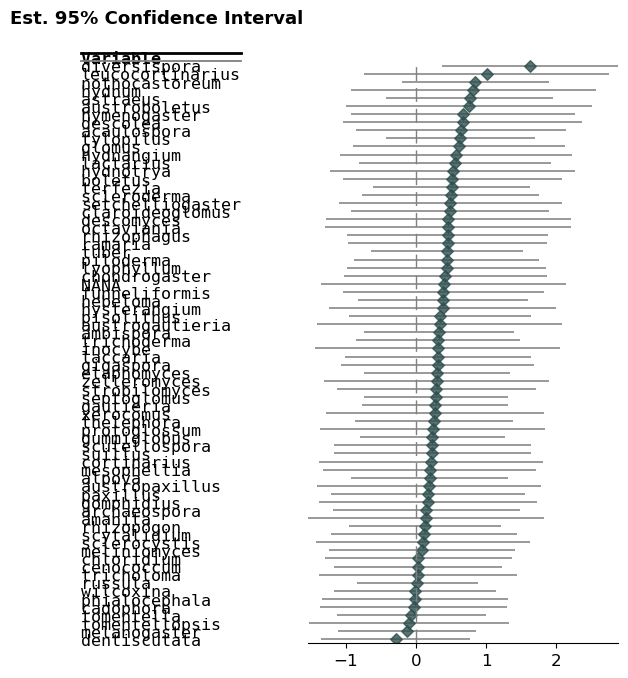

In [526]:
fp.forestplot(subgroup_results,  # the dataframe with results data
              estimate="Overall Effect Size",  # col containing estimated effect size 
              ll="Overall CI Lower", hl="Overall CI Upper",  # columns containing conf. int. lower and higher limits
              varlabel="Fungal Genus",  # column containing variable label
              ylabel="Est. 95% Confidence Interval",  # y-label title
              # groupvar= "Functional Group", #add variable groupings
              annote=[],  # columns to report on left of plot
              annoteheaders=[],  # ^corresponding headers
              sort=True,  # sort estimates in ascending order
              table=True,  # Format as a table
              # Additional kwargs for customizations
              **{"marker": "D",  # set maker symbol as diamond
                 "markersize": 35,  # adjust marker size
                 "xlinestyle": (0, (10, 5)),  # long dash for x-reference line 
                 "xlinecolor": "#808080",  # gray color for x-reference line
                 "xtick_size": 12,  # adjust x-ticker fontsize
                }  
              )

plt.show()

In [528]:
# Filter out rows where FungalGenus is "Unknown"
myco_data_filtered = myco_data[myco_data['FungalGenus'] != 'Unknown']

# Group the filtered data by the combination of PlantSpecies and FungalGenus
subgroups2 = myco_data_filtered.groupby(['FUNGROUP', 'FungalGenus'])

# Define an empty DataFrame to store results
subgroup_results2 = pd.DataFrame(columns=[
    'Functional Group-Fungal Genus Combination',
    'Overall Effect Size',
    'Overall CI Lower',
    'Overall CI Upper'
])

for subgroup_name2, subgroup_data2 in subgroups2:
    # Calculate weights and effect estimates for each subgroup
    sigma_squared = np.array(subgroup_data2['ESTVAR1'])
    weights_re = 1 / (tau_squared + sigma_squared)
    effect_estimate = np.array(subgroup_data2['EFFECTSIZE1'])
    
    # Calculate overall effect size for the subgroup
    mean_effect_size_re = np.sum(weights_re * effect_estimate) / np.sum(weights_re)
    # overall_effect_sizes.append(mean_effect_size_re)
    
    # Calculate standard error (SEt) for the subgroup
    SEt = np.sqrt(np.mean(sigma_squared) + tau_squared)
    
    # Calculate confidence intervals for the subgroup
    subgroup_CI_lower = mean_effect_size_re - z_score * SEt
    subgroup_CI_upper = mean_effect_size_re + z_score * SEt
    overall_CI_lower.append(subgroup_CI_lower)
    overall_CI_upper.append(subgroup_CI_upper)

    # Append results as a Series to the DataFrame
    subgroup_results2 = subgroup_results2.append(pd.Series({
        'Functional Group-Fungal Genus Combination': subgroup_name2,
        'Overall Effect Size': mean_effect_size_re,
        'Overall CI Lower': subgroup_CI_lower,
        'Overall CI Upper': subgroup_CI_upper
    }), ignore_index=True)

# # Convert results to DataFrame
# subgroup_results2 = pd.DataFrame({
#     'Plant Species - Fungal Genus Combination': subgroups2.groups.keys(),
#     'Overall Effect Size': overall_effect_sizes2,
#     'Overall CI Lower': overall_CI_lower2,
#     'Overall CI Upper': overall_CI_upper2
# })

# Print subgroup results
print(subgroup_results2)

    Functional Group-Fungal Genus Combination  Overall Effect Size  \
0                      (C3grass, acaulospora)            -0.229535   
1                  (C3grass, claroideoglomus)             0.078216   
2                    (C3grass, funneliformis)             0.736509   
3                        (C3grass, gigaspora)            -0.582860   
4                           (C3grass, glomus)             1.089259   
..                                        ...                  ...   
117                         (nonNwood, tuber)             0.436882   
118                     (nonNwood, tylopilus)             0.632523   
119                     (nonNwood, wilcoxina)            -0.012908   
120                     (nonNwood, xerocomus)             0.267882   
121                  (nonNwood, zelleromyces)             0.292999   

     Overall CI Lower  Overall CI Upper  
0           -2.310518          1.851447  
1           -1.542028          1.698461  
2           -0.912476          2.

In [529]:
# Filter out rows where FungalGenus is "Unknown"
myco_data_filtered = myco_data[myco_data['FungalGenus'] != 'Unknown']

# Group the filtered data by the combination of PlantSpecies and FungalGenus
subgroups2 = myco_data_filtered.groupby(['PlantSpecies', 'FungalGenus'])

# Define an empty DataFrame to store results
subgroup_results2 = pd.DataFrame(columns=[
    'Plant Species-Fungal Genus Combination',
    'Overall Effect Size',
    'Overall CI Lower',
    'Overall CI Upper'
])

for subgroup_name2, subgroup_data2 in subgroups2:
    # Calculate weights and effect estimates for each subgroup
    sigma_squared = np.array(subgroup_data2['ESTVAR1'])
    weights_re = 1 / (tau_squared + sigma_squared)
    effect_estimate = np.array(subgroup_data2['EFFECTSIZE1'])
    
    # Calculate overall effect size for the subgroup
    mean_effect_size_re = np.sum(weights_re * effect_estimate) / np.sum(weights_re)
    # overall_effect_sizes.append(mean_effect_size_re)
    
    # Calculate standard error (SEt) for the subgroup
    SEt = np.sqrt(np.mean(sigma_squared) + tau_squared)
    
    # Calculate confidence intervals for the subgroup
    subgroup_CI_lower = mean_effect_size_re - z_score * SEt
    subgroup_CI_upper = mean_effect_size_re + z_score * SEt
    overall_CI_lower.append(subgroup_CI_lower)
    overall_CI_upper.append(subgroup_CI_upper)

    # Append results as a Series to the DataFrame
    subgroup_results2 = subgroup_results2.append(pd.Series({
        'Plant Species-Fungal Genus Combination': subgroup_name2,
        'Overall Effect Size': mean_effect_size_re,
        'Overall CI Lower': subgroup_CI_lower,
        'Overall CI Upper': subgroup_CI_upper
    }), ignore_index=True)

# # Convert results to DataFrame
# subgroup_results2 = pd.DataFrame({
#     'Plant Species - Fungal Genus Combination': subgroups2.groups.keys(),
#     'Overall Effect Size': overall_effect_sizes2,
#     'Overall CI Lower': overall_CI_lower2,
#     'Overall CI Upper': overall_CI_upper2
# })

# Print subgroup results
print(subgroup_results2)

    Plant Species-Fungal Genus Combination  Overall Effect Size  \
0       (acacia_abyssinica, funneliformis)             0.230552   
1        (acacia_ampliceps, funneliformis)             0.295505   
2         (acacia_auriculiformis, boletus)             0.727644   
3         (acacia_eriopoda, funneliformis)             0.299980   
4         (acacia_holosericea, pisolithus)             0.798863   
..                                     ...                  ...   
734                  (zea_mays, gigaspora)            -0.610301   
735                (zea_mays, rhizophagus)             0.783892   
736     (ziziphus_mauritiana, acaulospora)             1.408767   
737   (ziziphus_mauritiana, funneliformis)             0.751988   
738     (ziziphus_mauritiana, rhizophagus)             1.080678   

     Overall CI Lower  Overall CI Upper  
0           -0.856881          1.317985  
1           -0.825748          1.416758  
2           -1.018768          2.474056  
3           -0.821273      

In [530]:
print(subgroup_results2['Plant Species-Fungal Genus Combination'])

#see if it contains tuples or strings for variable labels

0        (acacia_abyssinica, funneliformis)
1         (acacia_ampliceps, funneliformis)
2          (acacia_auriculiformis, boletus)
3          (acacia_eriopoda, funneliformis)
4          (acacia_holosericea, pisolithus)
                       ...                 
734                   (zea_mays, gigaspora)
735                 (zea_mays, rhizophagus)
736      (ziziphus_mauritiana, acaulospora)
737    (ziziphus_mauritiana, funneliformis)
738      (ziziphus_mauritiana, rhizophagus)
Name: Plant Species-Fungal Genus Combination, Length: 739, dtype: object


In [531]:
subgroup_results2['Plant Species-Fungal Genus Combination'] = [f"{species} - {genus}" for species, genus in subgroup_results2['Plant Species-Fungal Genus Combination']]


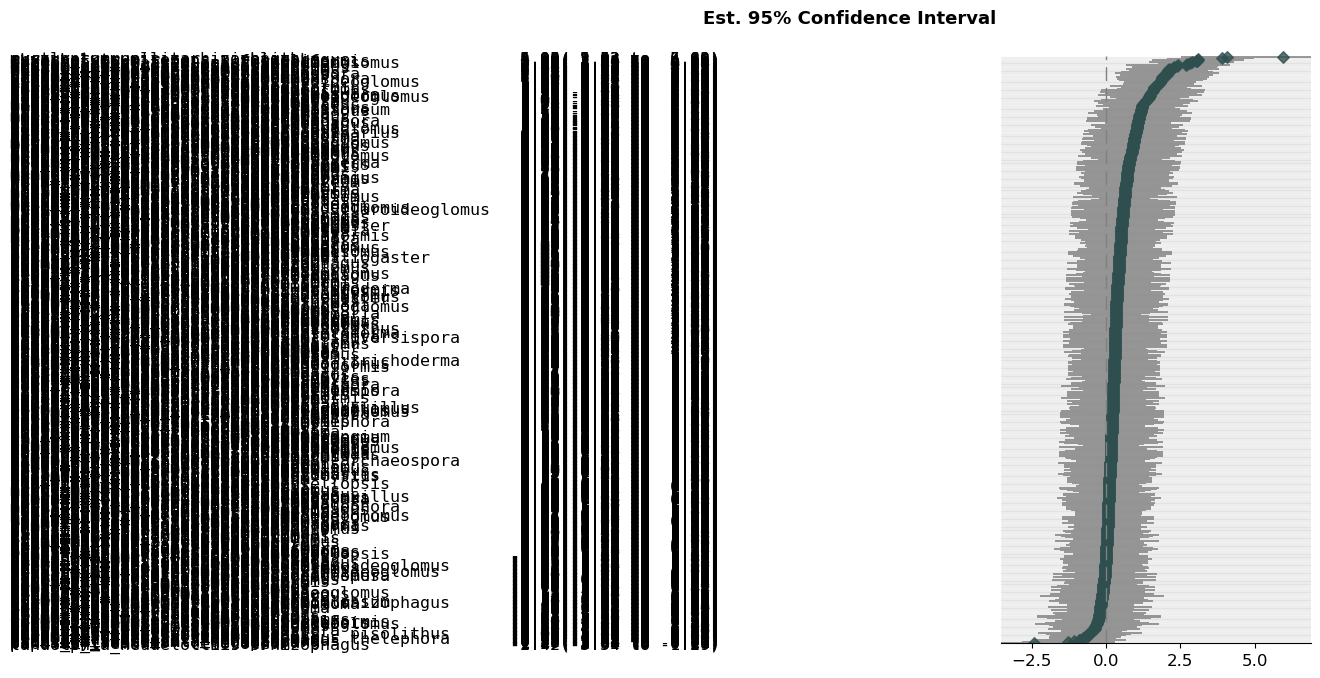

In [532]:
fp.forestplot(subgroup_results2,  # the dataframe with results data
              estimate="Overall Effect Size",  # col containing estimated effect size 
              ll="Overall CI Lower", hl="Overall CI Upper",  # columns containing conf. int. lower and higher limits
              color_alt_rows=True,  # Gray alternate rows
              varlabel="Plant Species-Fungal Genus Combination",  # column containing variable label
              ylabel="Est. 95% Confidence Interval",  # y-label title
              sort=True,  # sort estimates in ascending order
              table=True,  # Format as a table
              # Additional kwargs for customizations
              **{"marker": "D",  # set maker symbol as diamond
                 "markersize": 35,  # adjust marker size
                 "xlinestyle": (0, (10, 5)),  # long dash for x-reference line 
                 "xlinecolor": "#808080",  # gray color for x-reference line
                 "xtick_size": 12,  # adjust x-ticker fontsize
                }  
              )
plt.show()

#also add a variable for the weight of each study and communicate the weight in number & size of the diamonds


In [533]:
# # ---------------------------------------------------------------------------
# # AttributeError                            Traceback (most recent call last)
# # Cell In[2144], line 1
# # ----> 1 fp.forestplot(subgroup_results2,  # the dataframe with results data
# #       2               estimate="Overall Effect Size",  # col containing estimated effect size 
# #       3               ll="Overall CI Lower", hl="Overall CI Upper",  # columns containing conf. int. lower and higher limits
# #       4               color_alt_rows=True,  # Gray alternate rows
# #       5               varlabel="Plant Species - Fungal Genus Combination",  # column containing variable label
# #       6               ylabel="Est. 95% Confidence Interval",  # y-label title
# #       7               sort=True,  # sort estimates in ascending order
# #       8               table=True,  # Format as a table
# #       9               # Additional kwargs for customizations
# #      10               **{"marker": "D",  # set maker symbol as diamond
# #      11                  "markersize": 35,  # adjust marker size
# #      12                  "xlinestyle": (0, (10, 5)),  # long dash for x-reference line 
# #      13                  "xlinecolor": "#808080",  # gray color for x-reference line
# #      14                  "xtick_size": 12,  # adjust x-ticker fontsize
# #      15                 }  
# #      16               )

# # File ~/opt/anaconda3/lib/python3.8/site-packages/forestplot/plot.py:179, in forestplot(dataframe, estimate, varlabel, ll, hl, form_ci_report, ci_report, groupvar, group_order, logscale, annote, annoteheaders, rightannote, right_annoteheaders, pval, capitalize, starpval, sort, sortby, flush, decimal_precision, figsize, xticks, ylabel, xlabel, yticker2, color_alt_rows, return_df, preprocess, table, ax, **kwargs)
# #     177     form_ci_report = True
# #     178 if preprocess:
# # --> 179     _local_df = _preprocess_dataframe(
# #     180         dataframe=_local_df,
# # ...
# # --> 160             label = label.rjust(len(label))
# #     161         dataframe.loc[ix, varlabel] = label
# #     162 return dataframe

# # AttributeError: 'tuple' object has no attribute 'rjust'


# # The error indicates that the _preprocess_dataframe function within fp.forestplot might be attempting to call the rjust method on a tuple object for the varlabel. This could be happening if there's an issue with how the variable labels are stored in your DataFrame.
# #fixed the error by adding this line before the plot:
# subgroup_results2['Plant Species-Fungal Genus Combination'] = [f"{species} - {genus}" for species, genus in subgroup_results2['Plant Species-Fungal Genus Combination']]

Data Preparation and Encoding For Multiple Regression Model

In [536]:
import pandas as pd

# Assuming you already have the cleaned dataframe myco_data_filtered
# If not, load your cleaned dataset

# Select predictor variables
predictors = ['PlantFamily', 'PlantSpecies', 'FungalGenus', 'PLANTLIFEHISTORY', 'FUNGROUP',
              'NONMYCOCONTROL', 'NONMYCOCONTROL2', 'FERTP', 'FERTN', 'INOC.COMPLEXITY',
              'STERILIZED', 'LOCATION']

# One-hot encode categorical variables
encoded_data = pd.get_dummies(myco_data_filtered[predictors], drop_first=True)

# Add continuous variables if needed
# If decide to include continuous variables, add them to the encoded_data dataframe

# Extract the outcome variable
outcome = myco_data_filtered['EFFECTSIZE1']

Build Regression Model

In [537]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(encoded_data, outcome, test_size=0.2, random_state=42)

# Initialize linear regression model
model = LinearRegression()

# Fit the model on training data
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)

# Calculate mean squared error (MSE) to evaluate model performance
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


Mean Squared Error: 1.3112665757614132e+24
